# SUP ML 1 - PREPROCESSING

# Librerias

In [6]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.5 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# fechas
from datetime import datetime

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# algoritmos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# métricas
import sklearn.metrics as metrics

# hiperparametrización
from sklearn.model_selection import GridSearchCV

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

import xgboost as xgb

from numpy import random
random.seed(42)

In [8]:
pd.set_option('display.max_columns',None)

# Importar train data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
df = pd.read_csv('/content/drive/MyDrive/NUCLIO/DSC032024_Entregable2_Alves_Asaro_Garcia_Moreno/telecom_churn_TRAINTEST.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [11]:
df.sample(10)

rev      mou  totmrc      da  ovrmou   ovrrev   vceovr  datovr  \
89610   89.4850   268.00   94.99  0.4950    0.00   0.0000   0.0000     0.0   
12456   59.1900   376.50   30.00  0.2475   78.50  27.4750  27.4750     0.0   
53403   52.9600   396.00   49.99  0.4950    6.75   2.0250   2.0250     0.0   
62905   10.0900    77.25   10.00  0.0000    0.00   0.0000   0.0000     0.0   
66339  102.6250   856.25   39.99  1.9800  196.75  68.8625  68.8625     0.0   
1966    30.2475   165.50   30.00  0.2475    0.00   0.0000   0.0000     0.0   
88332   72.9850   753.00   42.90  7.4250   87.50  35.0000  35.0000     0.0   
8341    36.4550   193.25   32.49  1.2375    9.75   2.4375   2.4375     0.0   
80680   38.3000  1007.25   52.49  0.4950    0.00   0.0000   0.0000     0.0   
6606   100.9800   177.50  109.99  0.9900    0.00   0.0000   0.0000     0.0   

         roam  change_mou  change_rev   drop_vce  drop_dat   blck_vce  \
89610  0.0000       53.00      0.4950   0.333333       0.0   0.333333   
12456  1.4675      317.50     77.2100   2.333333       0.0  12.000000   
53403  0.0000      -54.00     -2.9700   4.333333       0.0   6.000000   
62905  0.0000      -50.25     -0.0900   0.666667       0.0   0.000000   
66339  2.4375     -229.25    -41.5450   4.666667       0.0   1.333333   
1966   0.0000       24.50      0.7425   2.000000       0.0   0.666667   
88332  0.1600     -710.00   -111.3550  14.333333       0.0   3.333333   
8341   0.0000     -140.25     -3.9650   1.666667       0.0   4.000000   
80680  0.0000      336.75     -3.3100   0.333333       0.0  33.000000   
6606   0.0000     -177.50     -0.9900   1.000000       0.0   0.666667   

       blck_dat    unan_vce  unan_dat    plcd_vce  plcd_dat   recv_vce  \
89610       0.0   12.333333  0.000000   59.000000  0.000000  59.333333   
12456       0.0   13.333333  0.000000  118.000000  0.000000  46.666667   
53403       0.0   32.333333  0.000000  147.666667  0.000000  53.333333   
62905       0.0    6.333333  0.000000   32.333333  0.000000   4.000000   
66339       0.0   39.333333  0.333333  223.000000  0.333333  44.333333   
1966        0.0    5.666667  0.000000   71.000000  0.000000   1.333333   
88332       0.0  158.000000  0.000000  516.333333  0.000000  90.333333   
8341        0.0   10.333333  0.000000   78.666667  0.000000  23.666667   
80680       0.0   14.333333  0.000000  152.000000  0.000000  12.000000   
6606        0.0    7.000000  0.000000   65.000000  0.000000  12.666667   

       recv_sms    comp_vce  comp_dat   custcare    ccrndmou     cc_mou  \
89610       0.0   46.333333       0.0   0.000000    0.000000   0.000000   
12456       0.0   91.000000       0.0   1.000000   10.000000   9.616667   
53403       0.0  107.666667       0.0   0.333333    0.333333   0.216667   
62905       0.0   25.333333       0.0   0.000000    0.000000   0.000000   
66339       0.0  180.000000       0.0   1.000000    3.666667   3.150000   
1966        0.0   62.666667       0.0   0.000000    0.000000   0.000000   
88332       0.0  341.666667       0.0  27.666667  108.000000  92.910000   
8341        0.0   62.666667       0.0   0.000000    0.000000   0.000000   
80680       0.0  104.333333       0.0   9.333333   11.000000   6.736667   
6606        0.0   56.333333       0.0   0.000000    0.000000   0.000000   

        inonemin  threeway    mou_cvce  mou_cdat    mou_rvce  owylis_vce  \
89610  27.333333  0.000000   47.023333       0.0  130.803333    0.666667   
12456  26.000000  0.333333  145.586667       0.0   91.370000    6.666667   
53403  23.666667  0.000000  113.620000       0.0   97.863333   33.333333   
62905   1.666667  0.000000   51.810000       0.0    9.626667    1.666667   
66339  17.333333  0.000000  149.840000       0.0  134.566667  107.333333   
1966    0.666667  0.000000   67.790000       0.0    1.346667    9.000000   
88332  63.333333  0.666667  641.306667       0.0  113.226667   50.666667   
8341   11.666667  0.000000  110.700000       0.0   34.916667    7.000000   
80680   7.000000  1.6666

# Data Cleaning
* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

In [12]:
# Detectar observaciones sin target informado
df['churn'].isna().sum()

0

In [13]:
# Detectar filas duplicadas
print('Filas duplicadas:', df.duplicated().sum())
print('Filas filas con identificador duplicadas:', df['Customer_ID'].duplicated().sum())

Filas duplicadas: 0
Filas filas con identificador duplicadas: 0


In [14]:
df_customer_id = df['Customer_ID']

In [15]:
# Guardar el DataFrame en un archivo pickle
df_customer_id.to_pickle("df_customer_id.pkl")

# Cargar el DataFrame desde el archivo pickle para verificar
loaded_df = pd.read_pickle("df_customer_id.pkl")
(loaded_df.sample(10))

72548    1072549
51927    1051928
40373    1040374
53604    1053605
42959    1042960
39613    1039614
18755    1018756
42434    1042435
49056    1049057
88369    1088370
Name: Customer_ID, dtype: int64

In [ ]:
# Eliminar Columnas identificadoras
df = df.drop(columns=['Customer_ID'])

In [ ]:
# Eliminar filas que tienen todos sus valores vacíos:
df = df.dropna(how='all')

# Eliminar columnas que tienen todos sus valores vacíos:
df = df.dropna(axis=1, how='all')

In [ ]:
# Información del DataFrame luego de la limpieza básica
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float6

In [ ]:
df.sample(10)

rev      mou   totmrc      da  ovrmou   ovrrev   vceovr  datovr  \
72548  205.0175   900.00  99.6675  4.7025    0.00   0.0000   0.0000     0.0   
51927   53.2550   211.00  29.9900  0.4950   56.25  22.5000  22.5000     0.0   
40373   56.4200   351.50  50.0000  0.0000   18.00   5.4000   5.4000     0.0   
53604   60.6025  1263.25  44.9900  1.9800   61.25  21.4375  21.4375     0.0   
42959   50.4500  1213.25  46.3250  0.0000   33.75  11.8375  11.8375     0.0   
39613   58.1000   189.50  29.9900  0.0000    0.00   0.0000   0.0000     0.0   
18755   46.7900   315.25  39.9900  0.0000   48.00  16.8000  16.8000     0.0   
42434   11.6875    38.50  10.0000  0.0000    6.75   1.6875   1.6875     0.0   
49056  132.0875  1731.00  59.9900  0.0000  205.00  82.0000  82.0000     0.0   
88369   41.0550   821.75  48.7800  0.7425   24.00   9.6000   9.6000     0.0   

           roam  change_mou  change_rev   drop_vce  drop_dat   blck_vce  \
72548  102.6475     -197.00    -86.1475  38.000000       0.0   5.000000   
51927    0.0000       83.00     22.3350   1.666667       0.0  11.000000   
40373    0.0000      -59.50     -5.8300   0.000000       0.0   0.666667   
53604    1.1750      437.75     41.0875   8.333333       0.0   3.333333   
42959    0.0000     -119.25      8.2800   9.333333       0.0   0.666667   
39613   27.8400      -20.50    -27.3300   3.666667       0.0   1.000000   
18755    0.0000     -115.25    -16.8000   3.333333       0.0   0.333333   
42434    0.0000      -38.50     -1.6875   1.000000       0.0   0.000000   
49056    0.0975      949.00    189.9025  22.333333       0.0   5.333333   
88369    0.9325      280.25      3.4650   5.666667       0.0   6.333333   

       blck_dat    unan_vce  unan_dat    plcd_vce  plcd_dat    recv_vce  \
72548       0.0   54.333333       0.0  295.666667       0.0  122.666667   
51927       0.0    2.333333       0.0   86.000000       0.0   40.666667   
40373       0.0   49.000000       0.0  116.333333       0.0    7.000000   
53604       0.0   46.666667       0.0  225.666667       0.0   71.666667   
42959       0.0   51.666667       0.0  251.333333       0.0   48.000000   
39613       0.0   15.333333       0.0   54.000000       0.0   16.666667   
18755       0.0    5.666667       0.0   52.333333       0.0   31.000000   
42434       0.0    0.666667       0.0    3.666667       0.0    6.333333   
49056       0.0  100.000000       0.0  232.333333       0.0  131.666667   
88369       0.0   27.333333       0.0  198.000000       0.0   32.000000   

       recv_sms    comp_vce  comp_dat   custcare   ccrndmou     cc_mou  \
72548       0.0  212.333333       0.0   6.000000   8.666667   3.756667   
51927       0.0   71.666667       0.0   2.000000   2.333333   0.730000   
40373       0.0   66.666667       0.0   0.000000   0.000000   0.000000   
53604       0.0  168.666667       0.0   6.666667  14.333333  10.850000   
42959       0.0  191.666667       0.0  13.333333  21.333333  15.233333   
39613       0.0   34.666667       0.0   0.000000   0.000000   0.000000   
18755       0.0   44.666667       0.0   0.000000   0.000000   0.000000   
42434       0.0    2.666667       0.0   0.000000   0.000000   0.000000   
49056       0.0  114.000000       0.0   9.666667  13.666667   7.960000   
88369       0.0  159.333333       0.0   4.000000  11.666667   9.783333   

        inonemin  threeway    mou_cvce  mou_cdat    mou_rvce  owylis_vce  \
72548  70.333333  1.333333  311.686667       0.0  146.266667   61.333333   
51927  25.000000  0.000000   54.353333       0.0   42.866667   16.666667   
40373   3.333333  0.000000  299.920000       0.0   27.143333   14.666667   
53604  32.333333  0.000000  801.143333       0.0  229.613333   43.666667   
42959  26.333333  1.333333  910.700000       0.0  109.146667   20.333333   
39613  12.000000  0.000000   82.166667       0.0   13.036667    0.666667   
18755  11.333333  0.000000  125.790000       0.0  120.986667    3.000000   
42434   3.666667  0.000000    6.886667       0.0    4.453333    0.6

# EDA: Analisis Exploratorio

In [ ]:
# Mostrando las columnas categóricas con su distribución de datos para determinar que tratamiento darles
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
for columna in columnas_categoricas:
    print(df[columna].value_counts(dropna=False, normalize=True).to_string().replace('\n', '\n\t'))
    print("\n")

new_cell
	U    0.653467
	Y    0.201267
	N    0.145267


crclscod
	AA    0.379467
	A     0.173356
	BA    0.125222
	CA    0.082100
	EA    0.061344
	B     0.041589
	DA    0.035567
	ZA    0.035300
	C     0.015756
	A2    0.008567
	U     0.004767
	E     0.003667
	E4    0.003389
	GA    0.002944
	D     0.002711
	G     0.002622
	I     0.002567
	JF    0.002133
	Z     0.002078
	J     0.001878
	M     0.001700
	C2    0.001689
	D4    0.001189
	Z4    0.001044
	K     0.001033
	W     0.000933
	V1    0.000778
	U1    0.000622
	EM    0.000511
	B2    0.000467
	Y     0.000422
	EC    0.000356
	O     0.000267
	CY    0.000233
	E2    0.000211
	CC    0.000211
	D5    0.000178
	C5    0.000156
	IF    0.000156
	ZY    0.000133
	Z1    0.000122
	Z5    0.000089
	H     0.000089
	TP    0.000056
	D2    0.000056
	GY    0.000056
	L     0.000044
	EF    0.000044
	Z2    0.000044
	A3    0.000033
	P1    0.000022
	S     0.000011
	V     0.000011
	ZF    0.000011


asl_flag
	N    0.882233
	Y    0.117767


prizm_social_one
	S      0.3

## Distribución del target

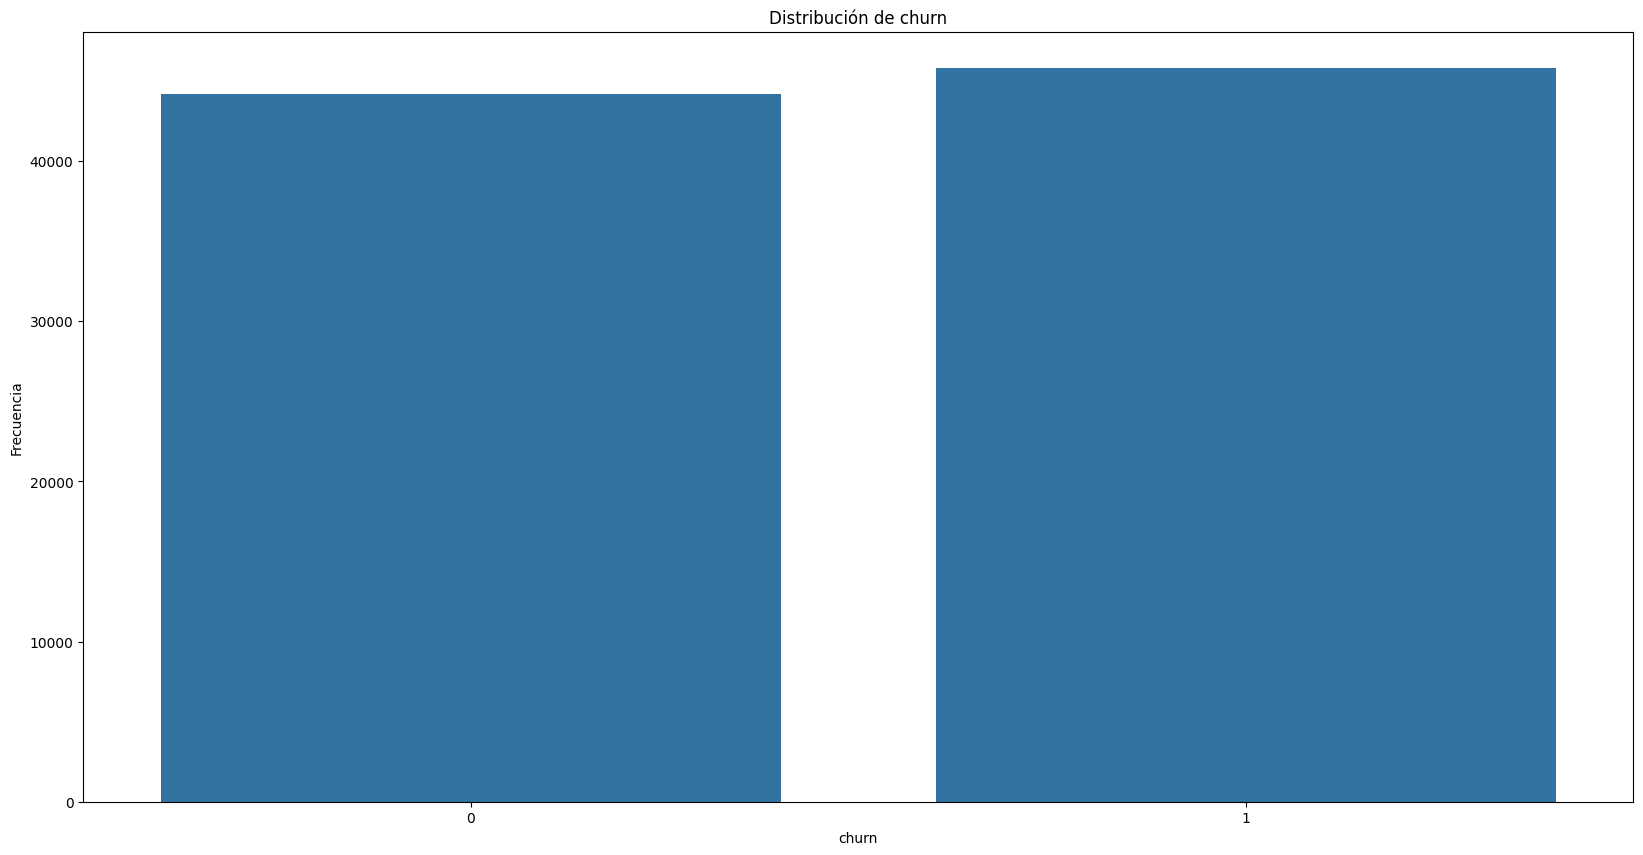

In [ ]:
sns.countplot(data=df, x='churn')
plt.title(f"Distribución de churn")
plt.ylabel('Frecuencia')
plt.show()
# la distrubución de churn es bastante desbalanceada

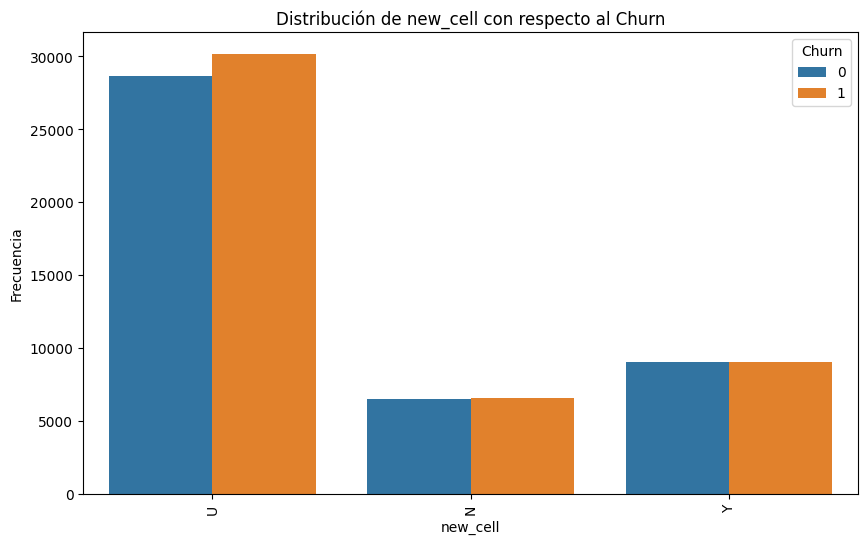

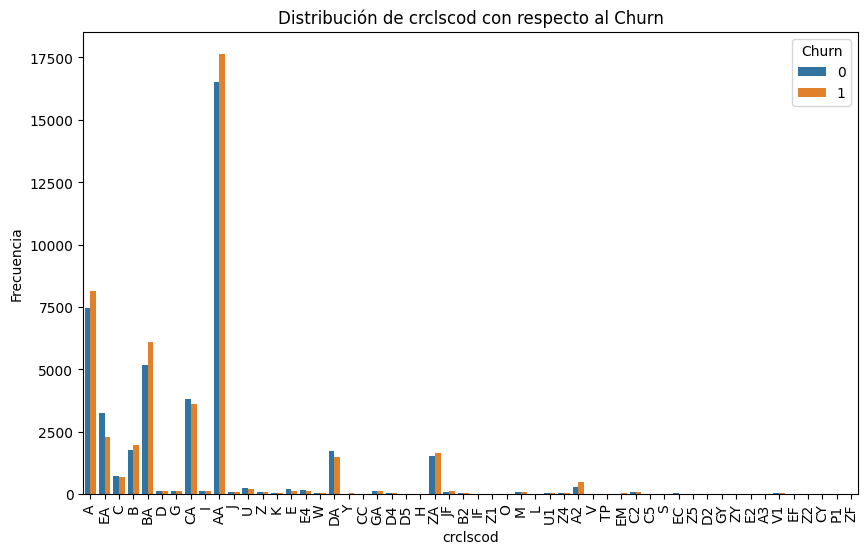

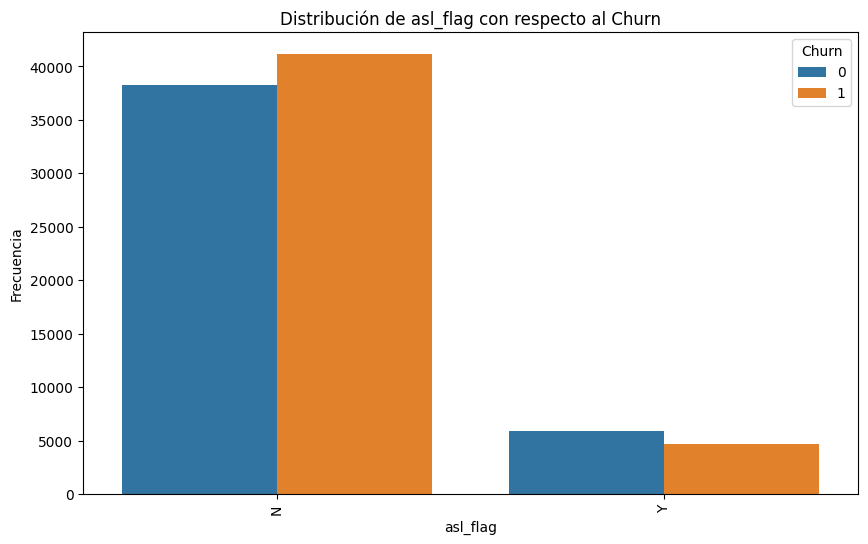

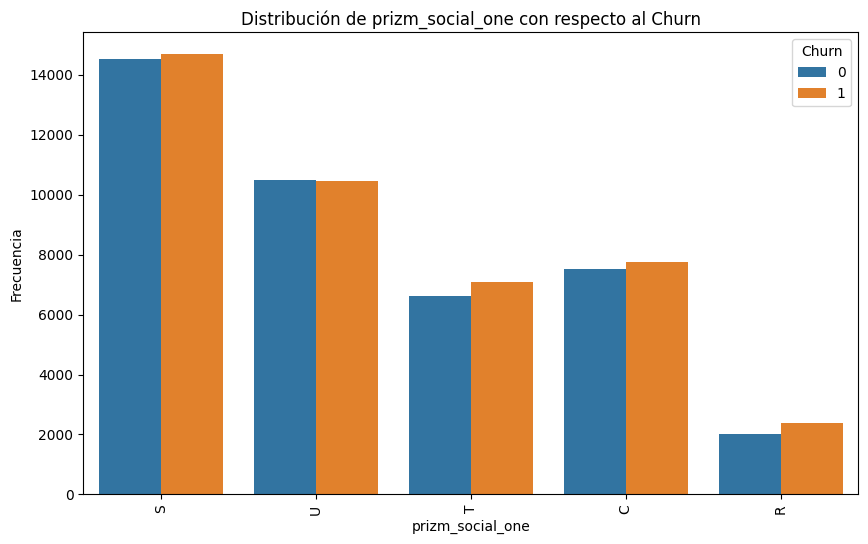

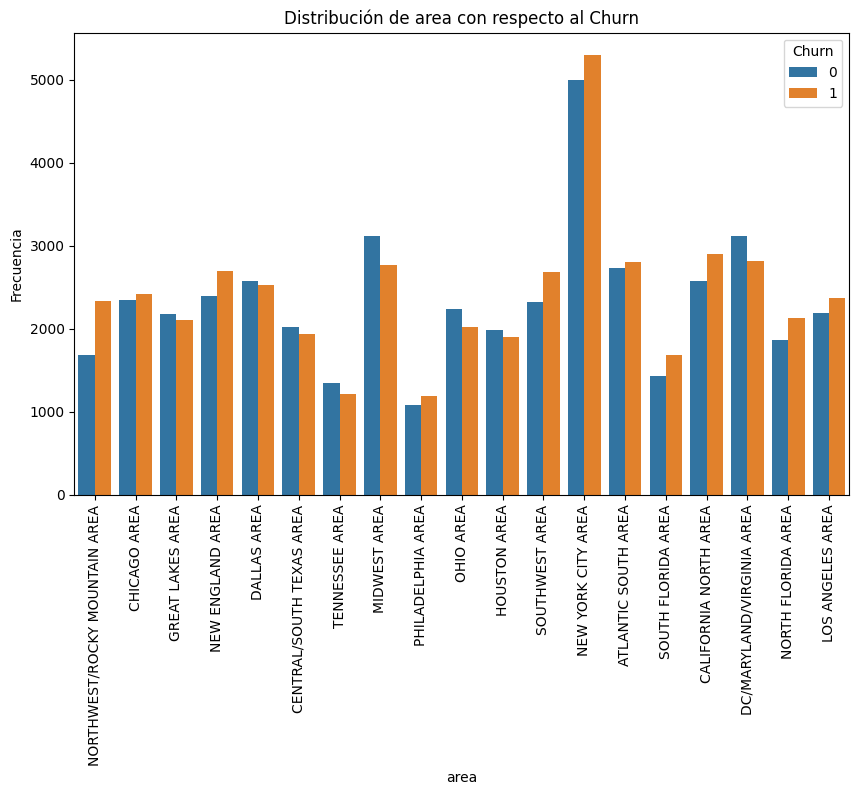

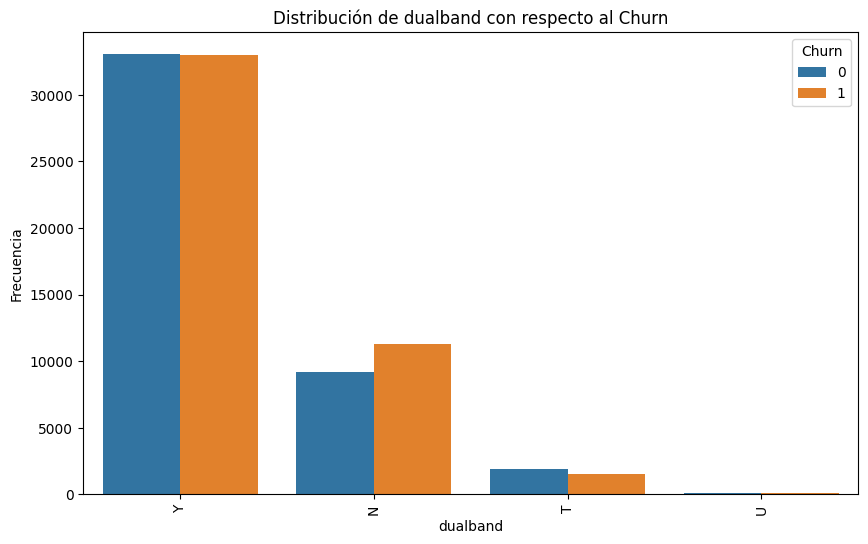

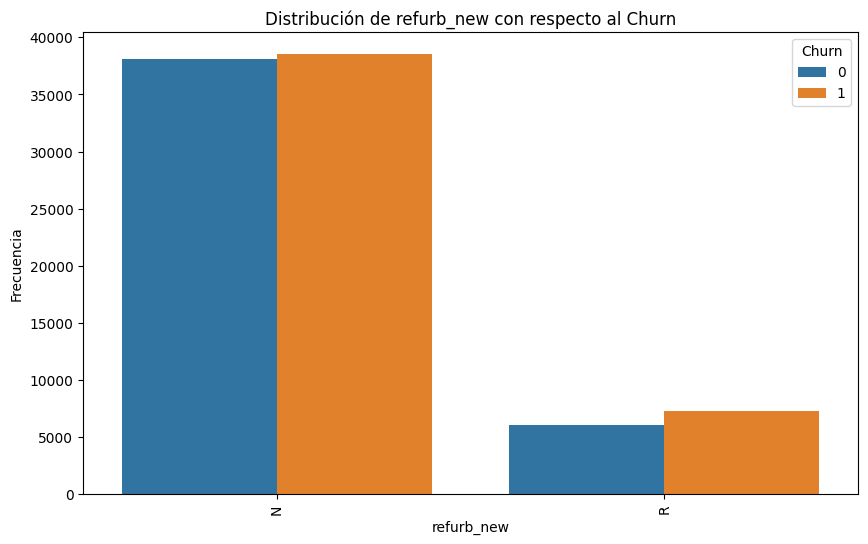

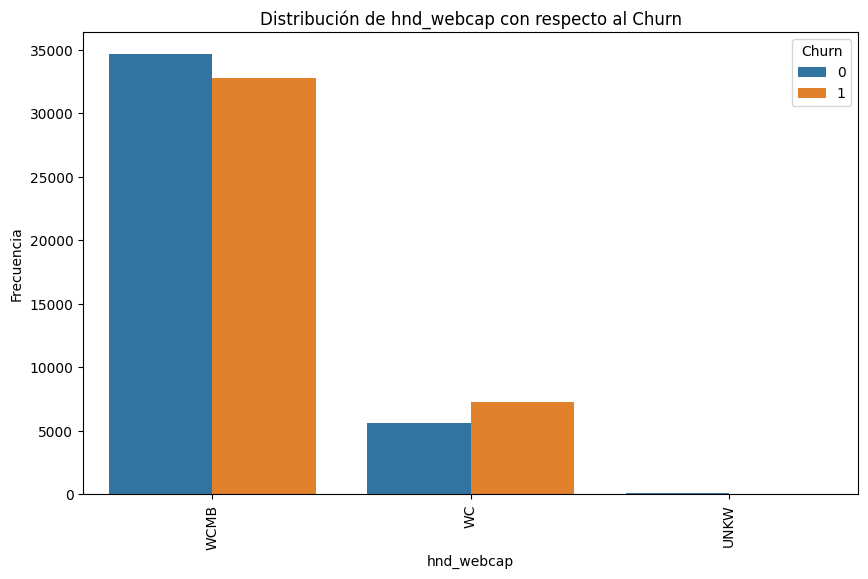

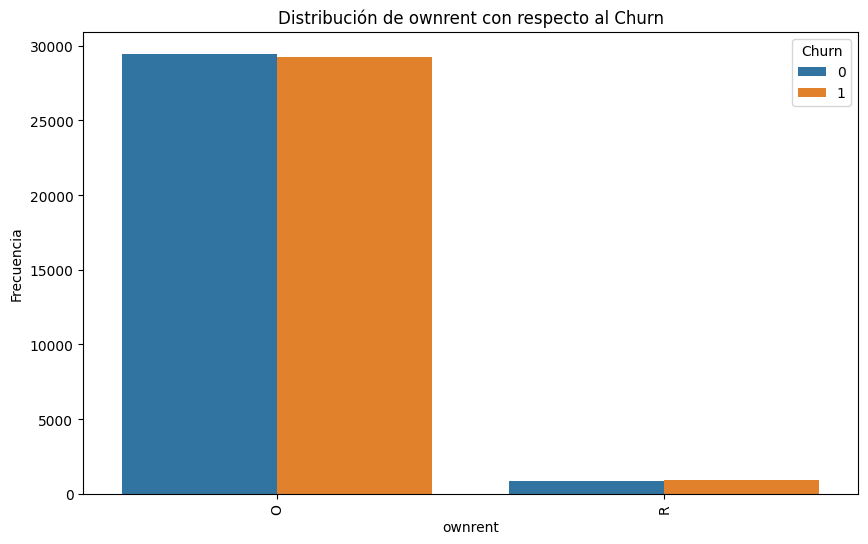

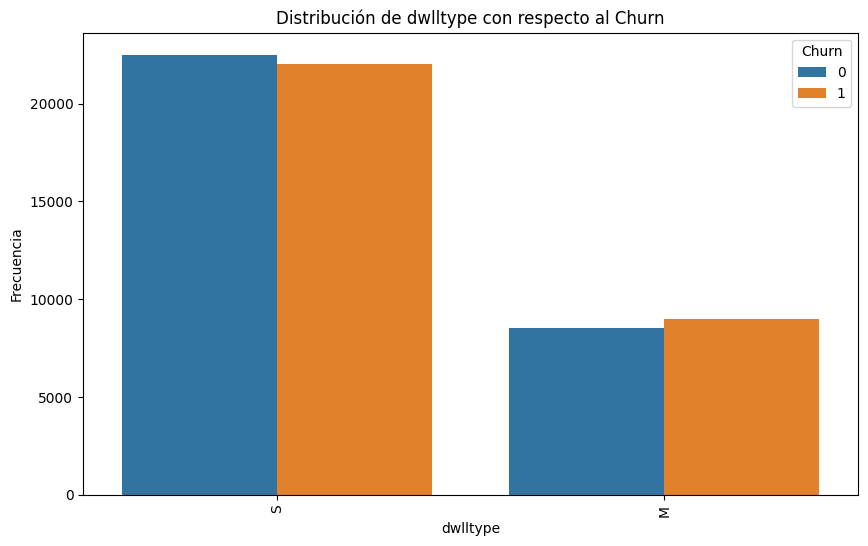

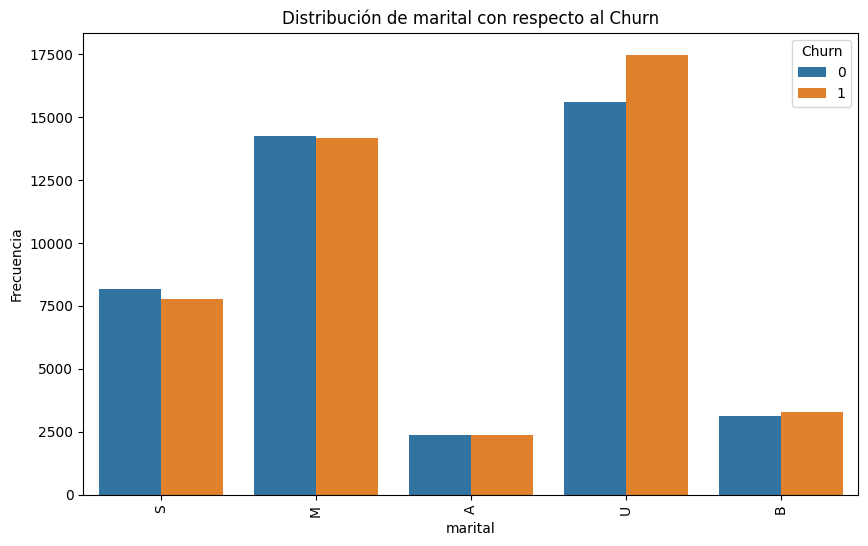

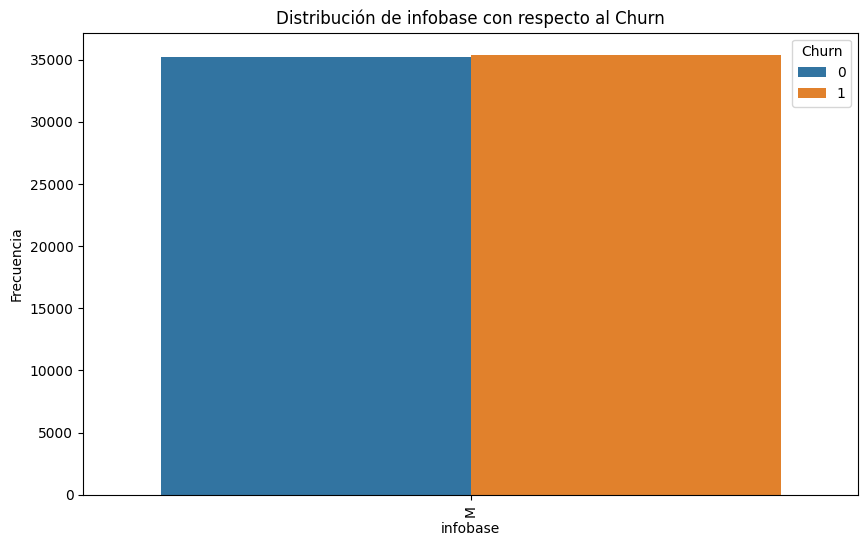

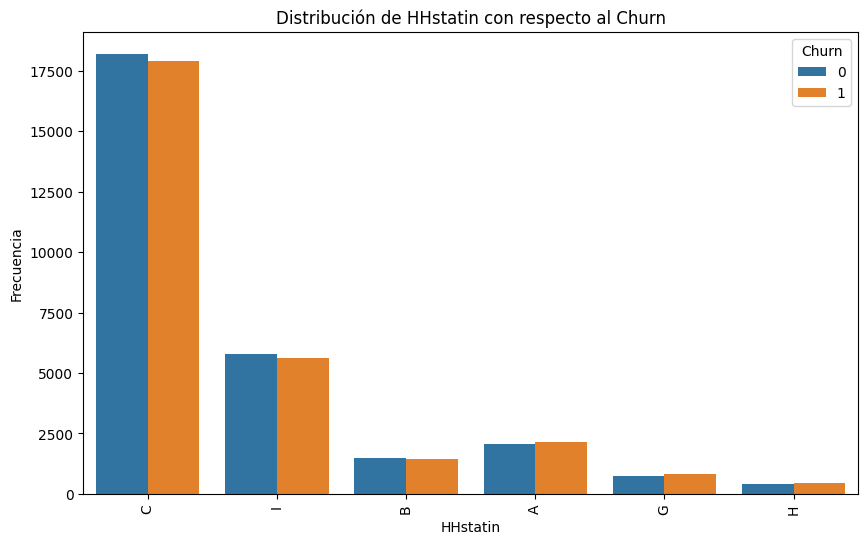

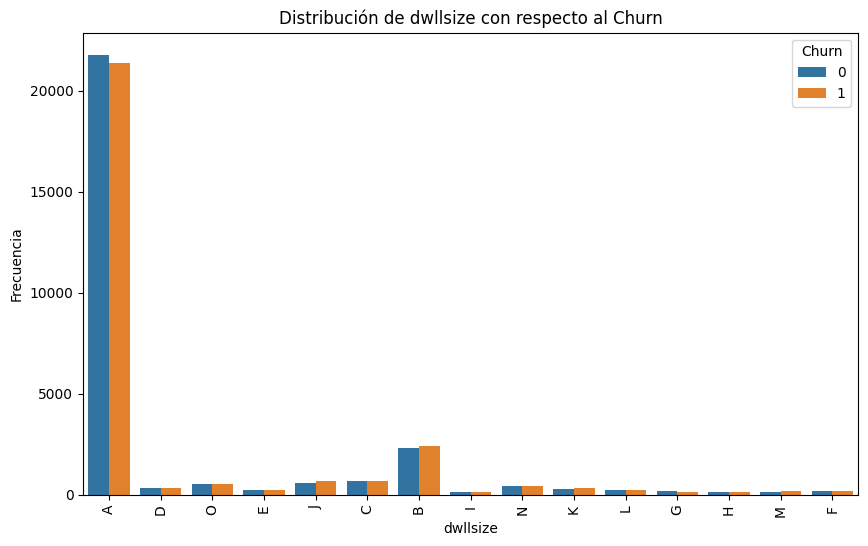

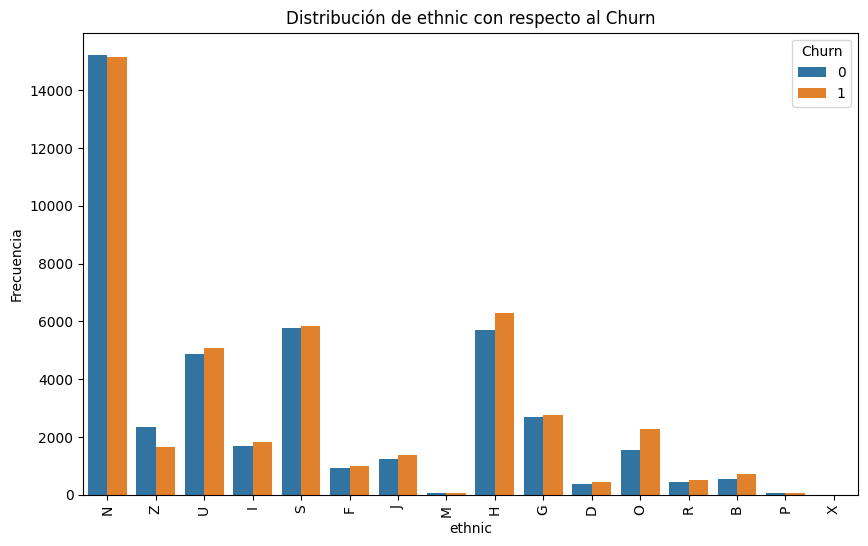

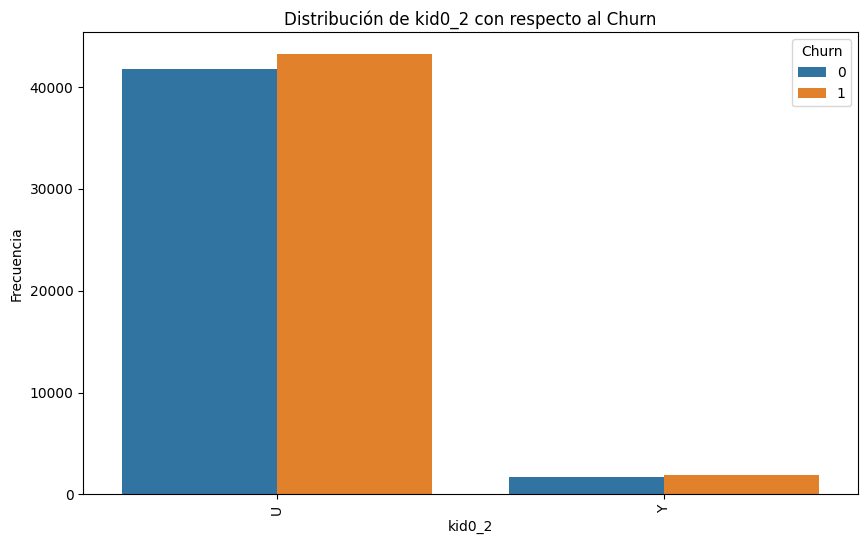

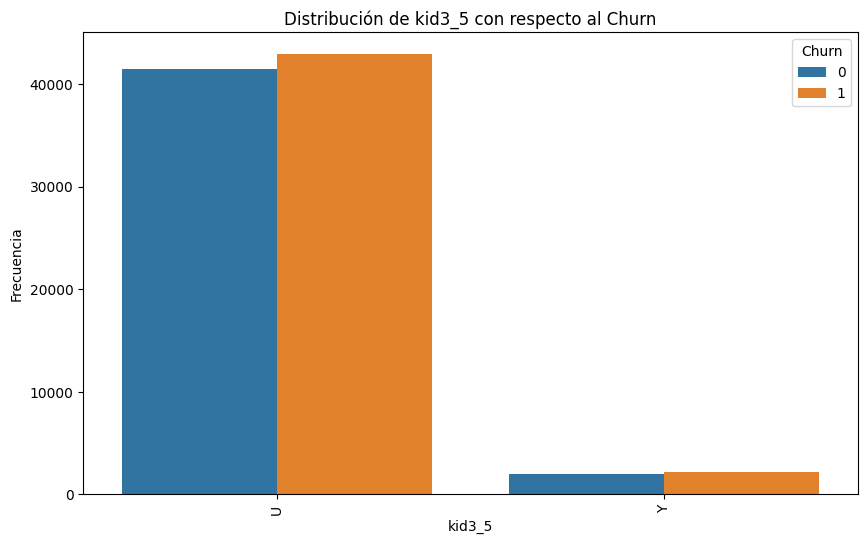

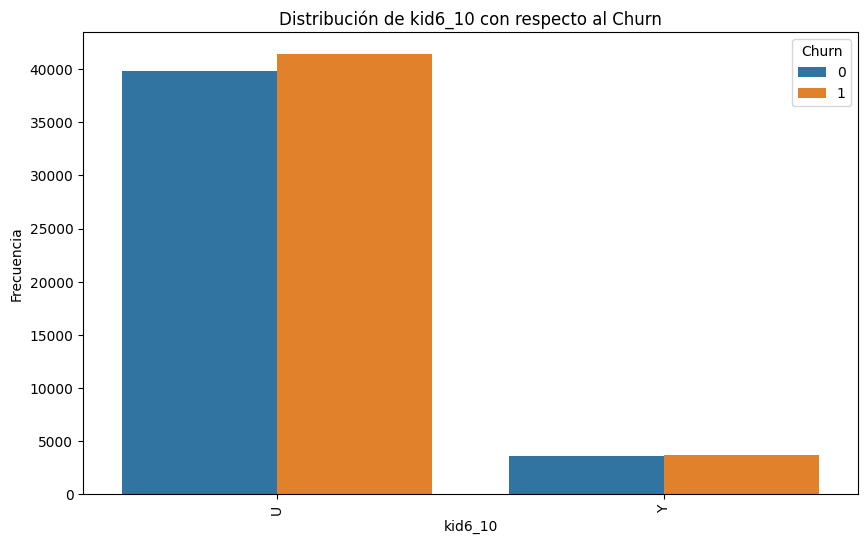

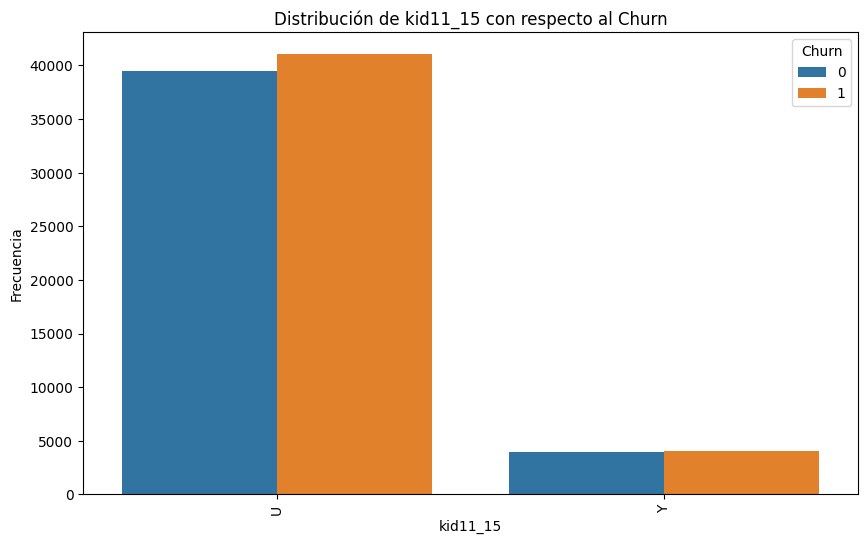

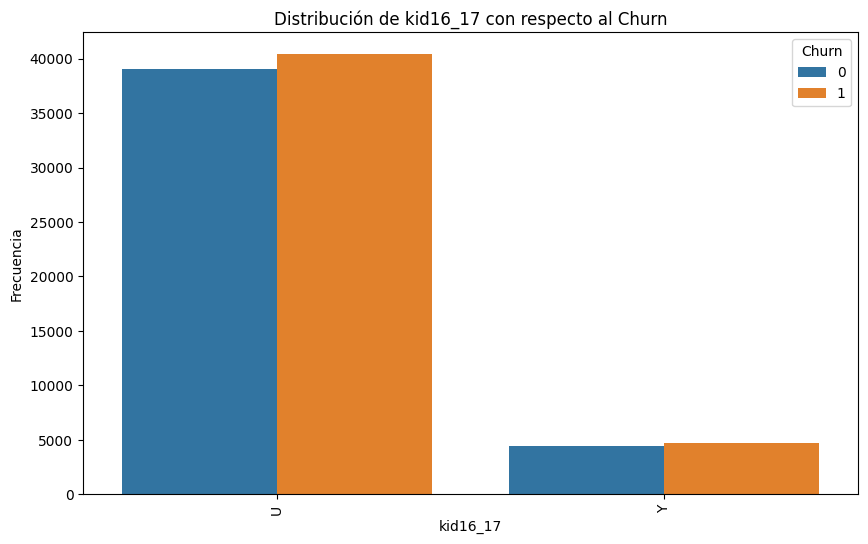

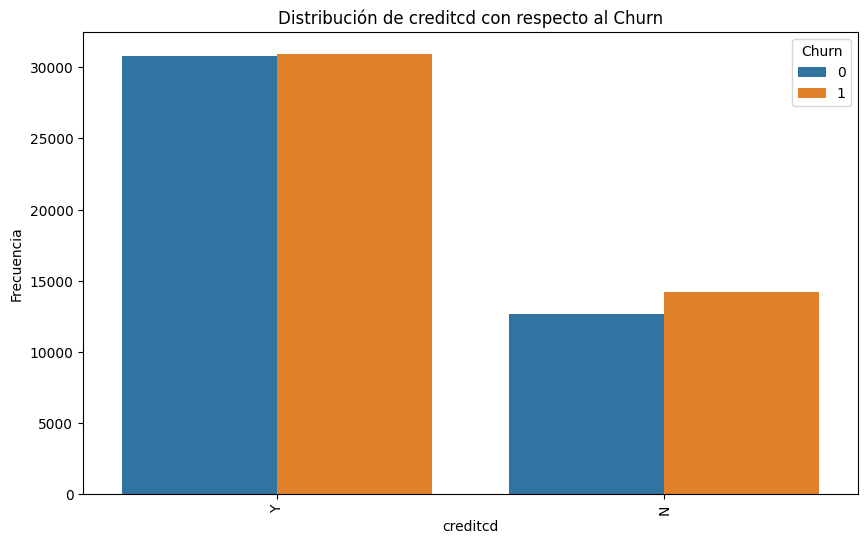

In [ ]:
# Gráficos de barras para variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='churn')
    plt.title(f"Distribución de {col} con respecto al Churn")
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=90)
    plt.show()

## Analisis de las variables con el target

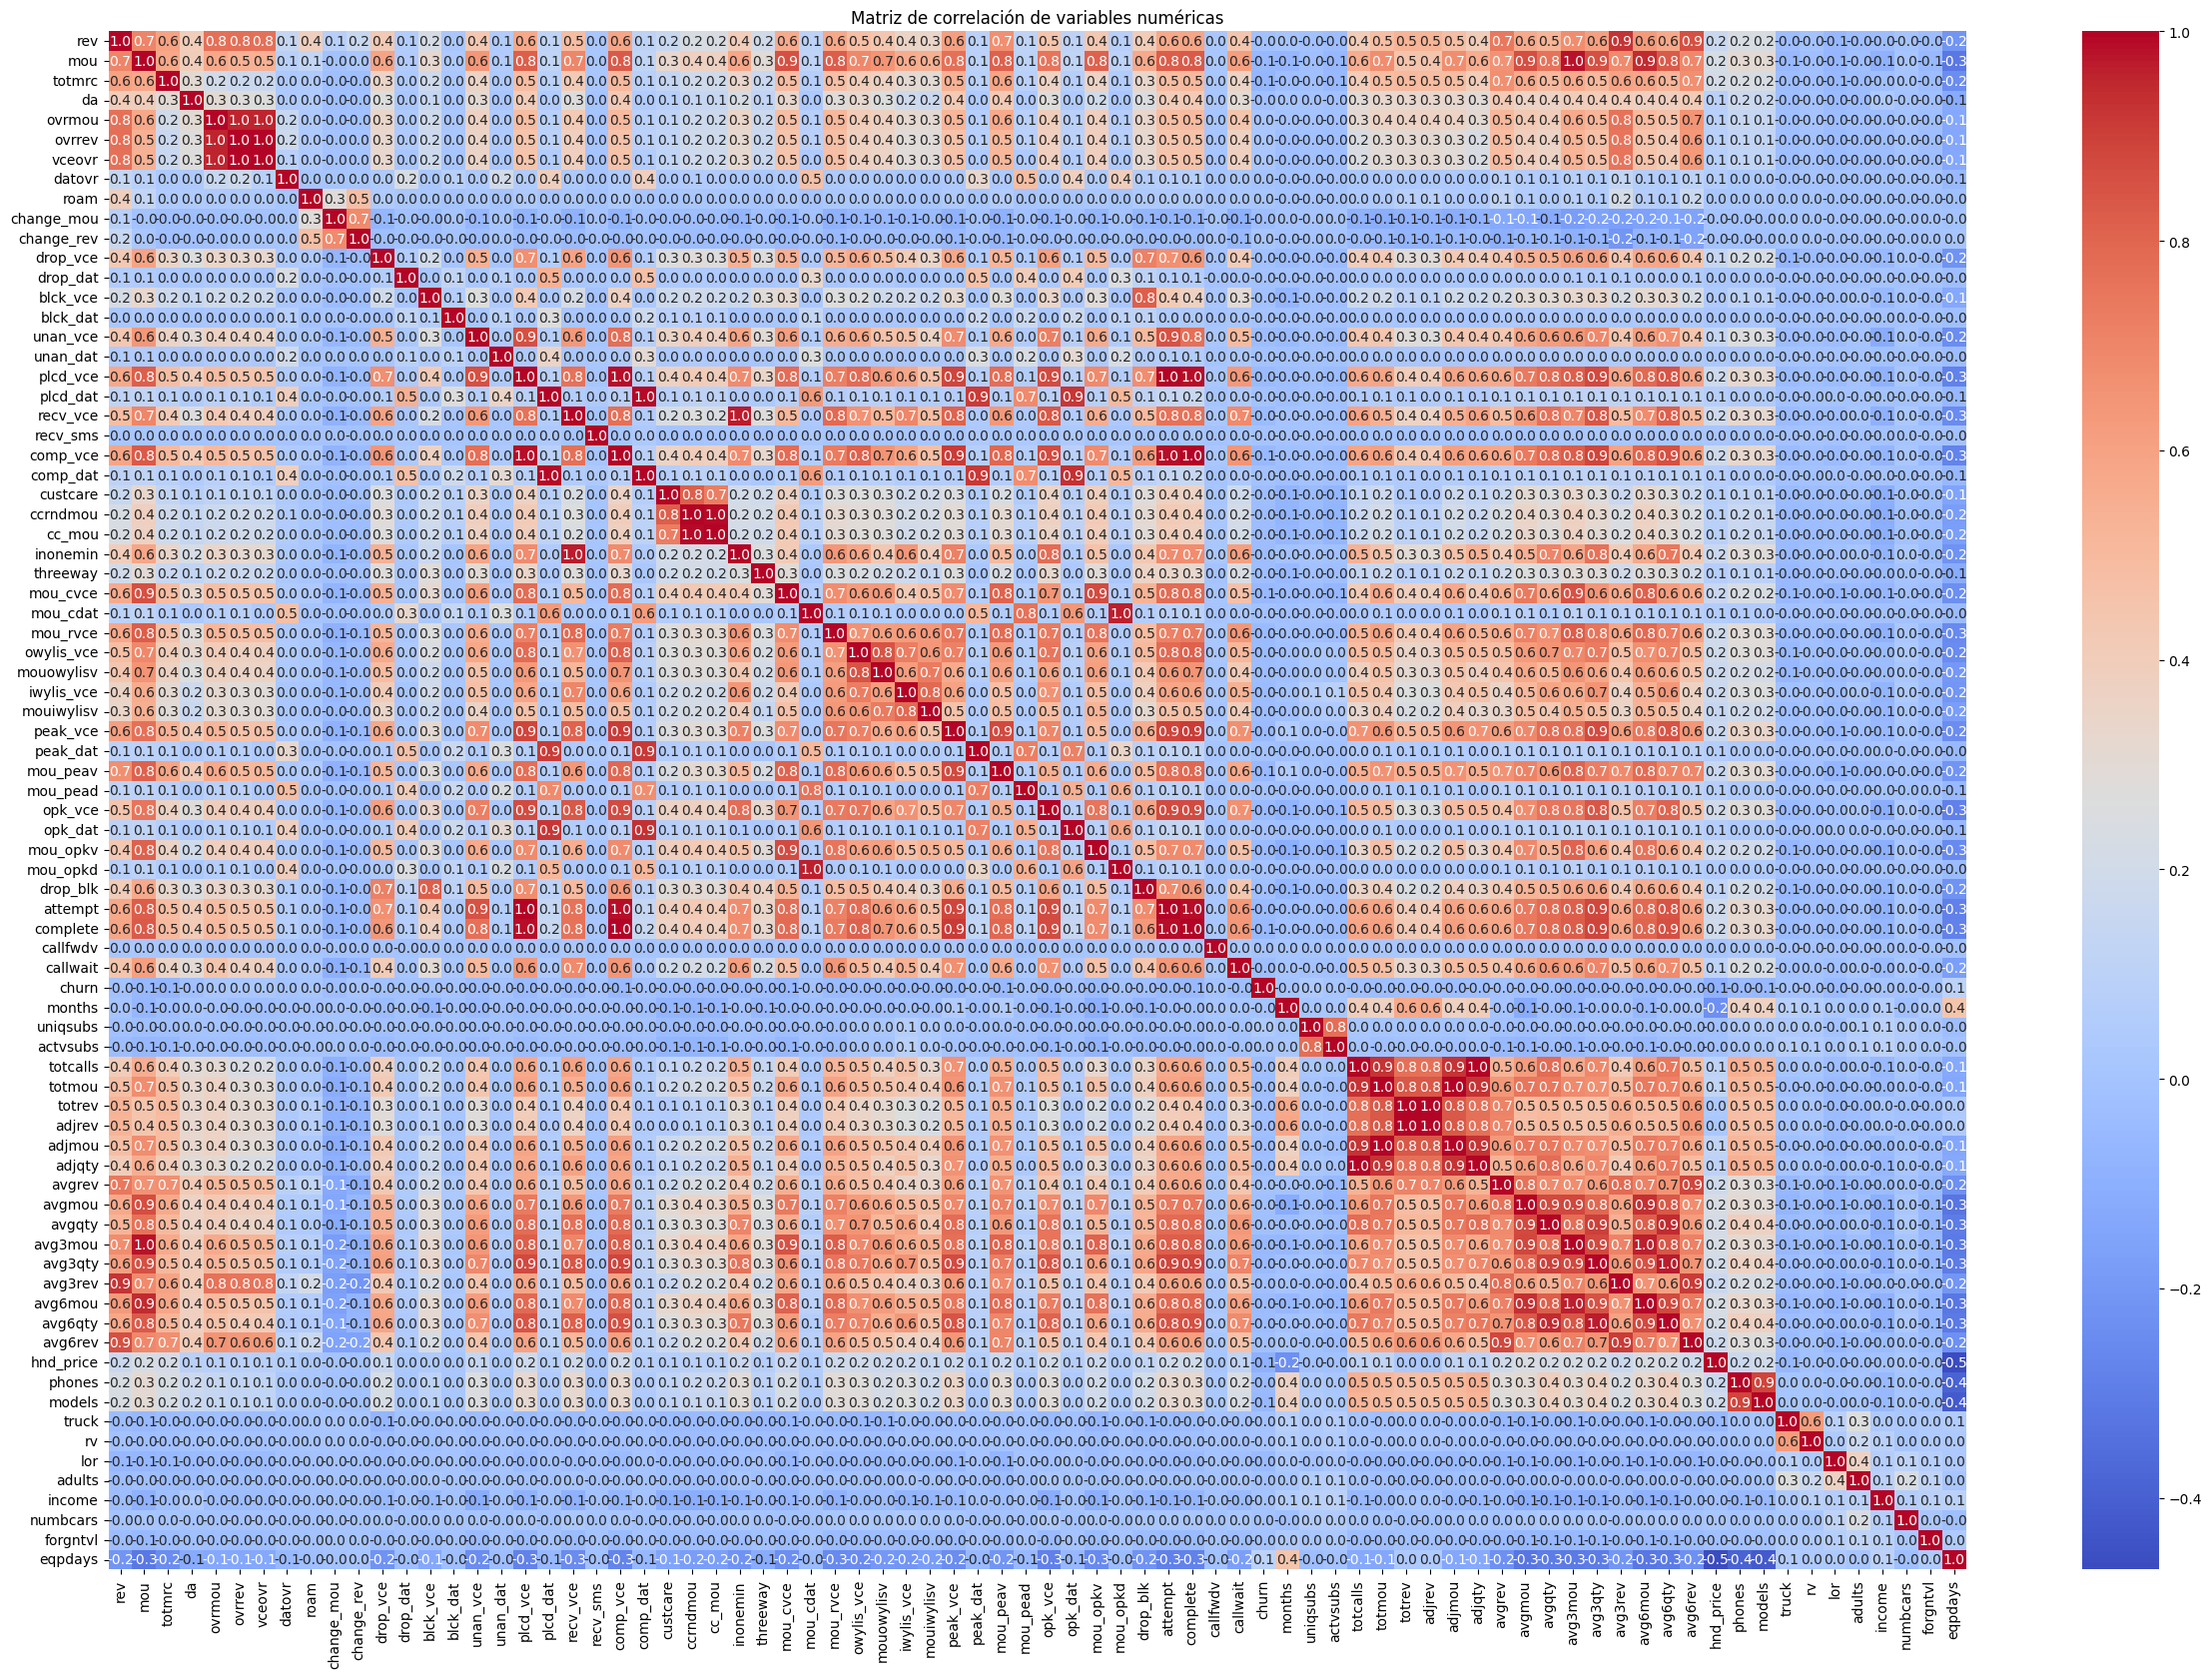

In [ ]:
# Matriz de correlación para variables numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(30, 20))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Matriz de correlación de variables numéricas")
plt.show()

In [ ]:
# las 10 mas correlacionadas con el target son:
numerical_corr_cols = df[numerical_cols].corr()['churn'].abs().sort_values(ascending=False)[1:11].index
print(numerical_corr_cols)

Index(['eqpdays', 'hnd_price', 'totmrc', 'mou', 'models', 'mou_cvce',
       'complete', 'comp_vce', 'mou_peav', 'avg3mou'],
      dtype='object')


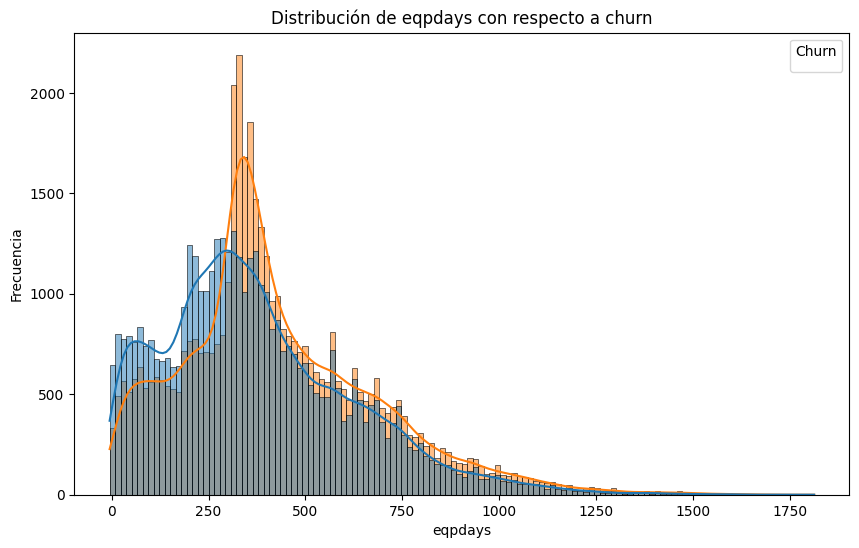

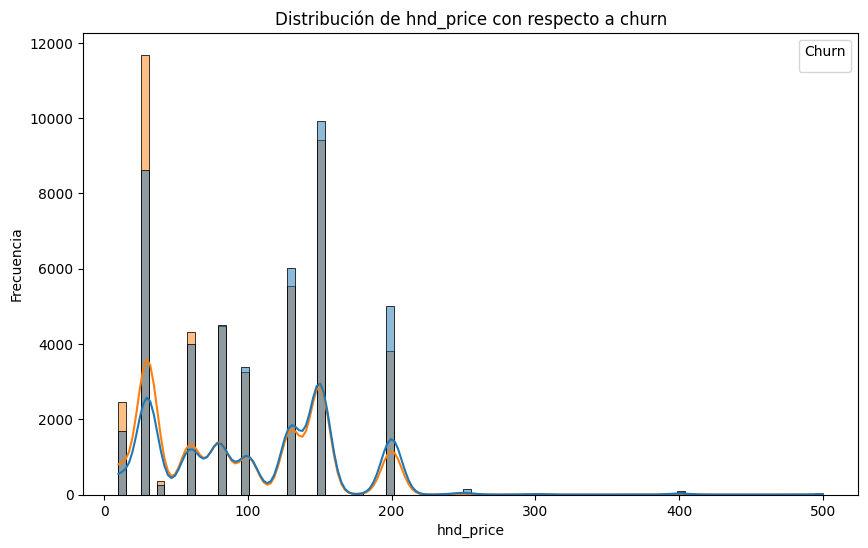

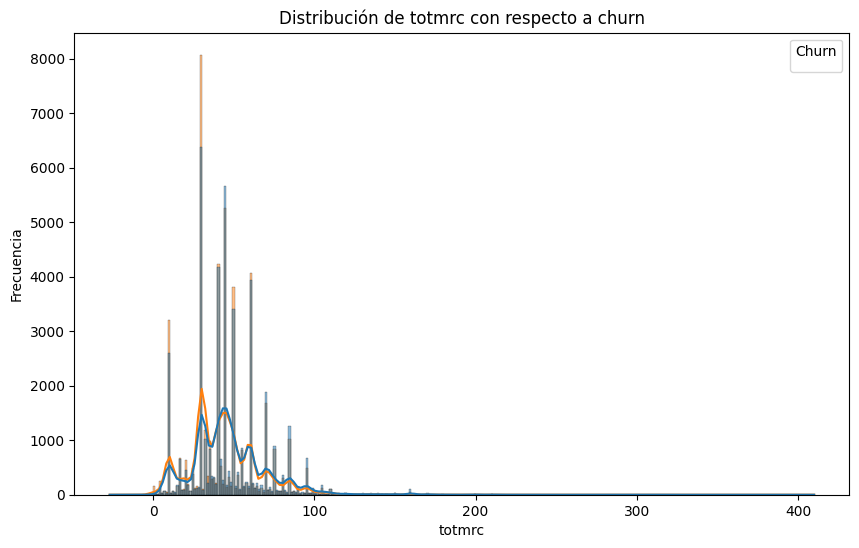

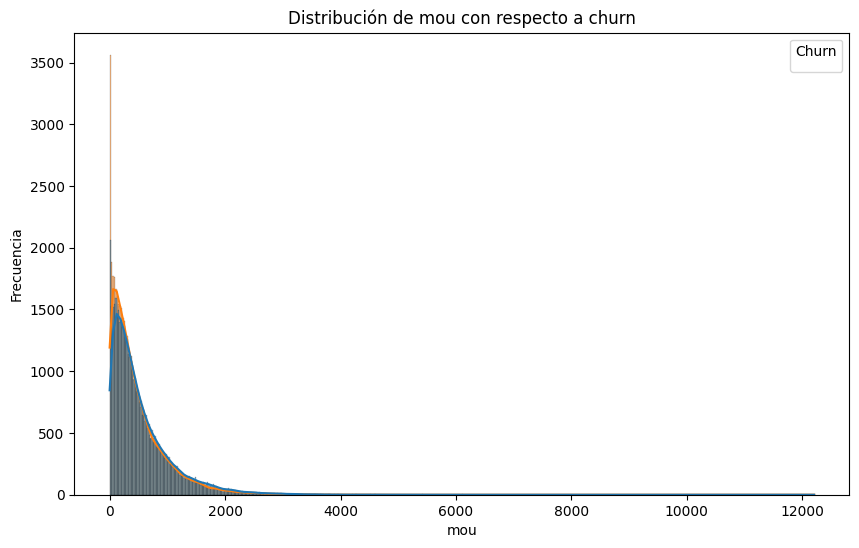

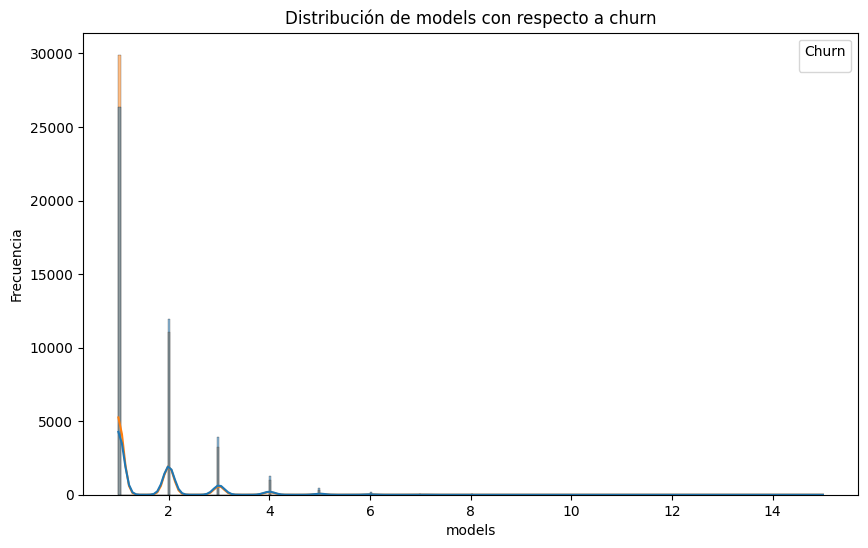

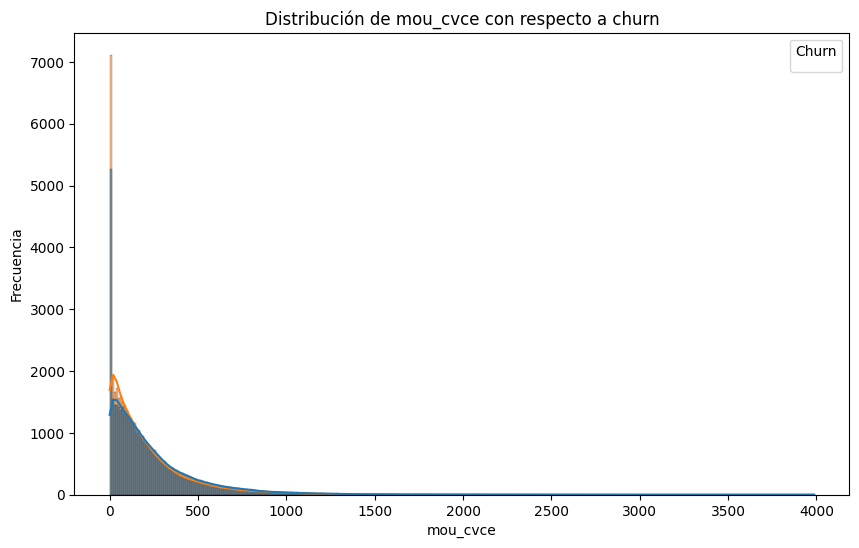

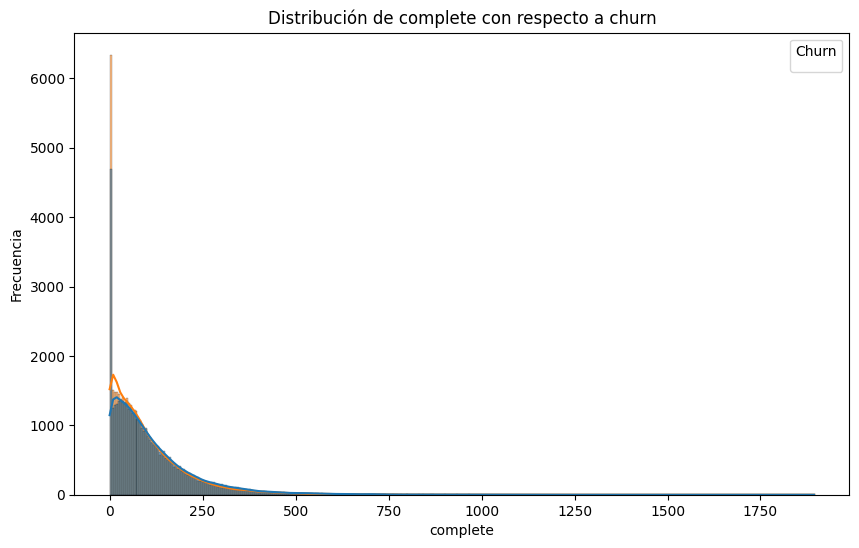

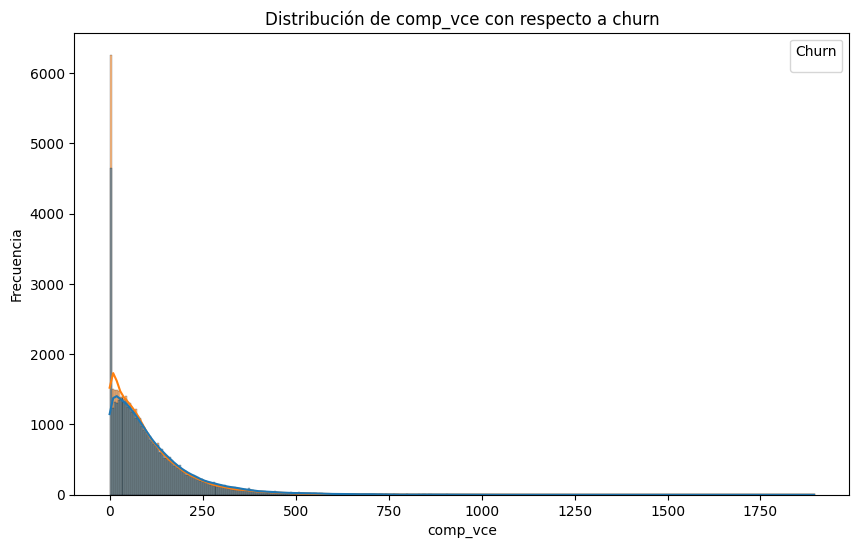

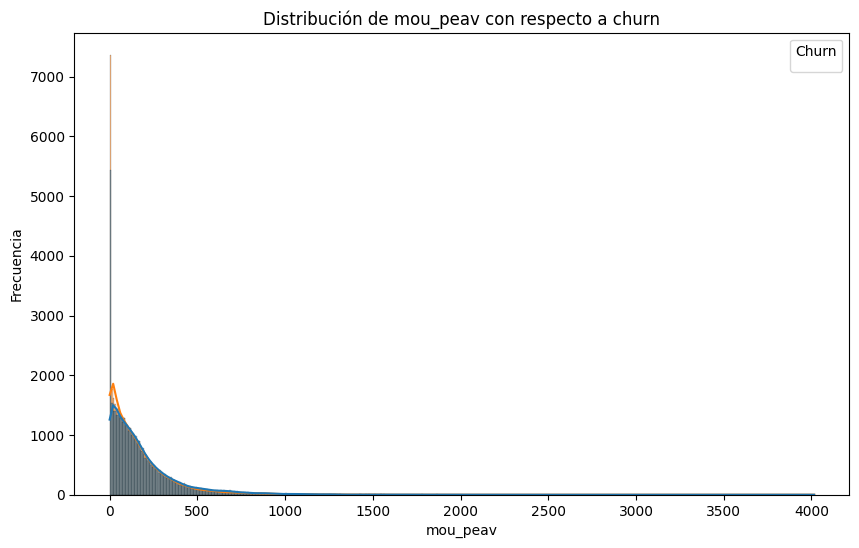

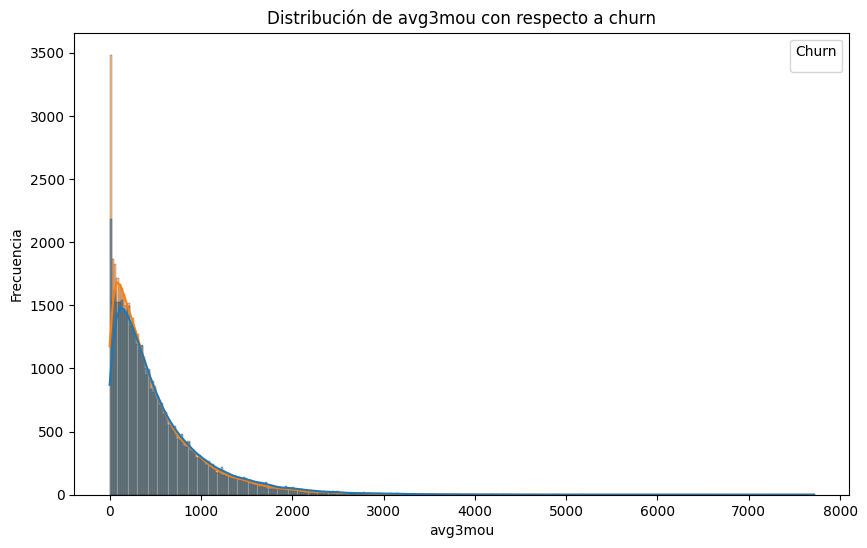

In [ ]:
# Realizar análisis de distribución y relación con la variable objetivo (churn)
# Histogramas para variables numéricas mas correlacionadas
for col in numerical_corr_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='churn', kde=True)
    plt.title(f"Distribución de {col} con respecto a churn")
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend(title='Churn', loc='upper right')
    plt.show()

# Imputación de nulos
* MODELOS DE ARBOLES: Imputar valor outlier.
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

In [ ]:
#Creamos un df de todas las columnas númericas para imputar nulos

df_churn_num = df.select_dtypes(include=['int64', 'float64'])
df_churn_num.isna().sum().sort_values(ascending=False)

numbcars    43568
lor         26502
income      22196
adults      20033
forgntvl     1451
            ...  
callfwdv        0
callwait        0
churn           0
months          0
opk_vce         0
Length: 78, dtype: int64

In [ ]:
# rellenar con la proporcion del resto de la variable en las columnas que tienen mayor cantidad de nulos
def fill_num_na(df_churn_num, columnas_rellenar):
    for col in columnas_rellenar:
        # Proporciones calculadas
        value_counts = df_churn_num[col].value_counts(normalize=True)

        # Lista de valores para rellenar
        fill_values = np.random.choice(value_counts.index, size=df_churn_num[col].isna().sum(), p=value_counts.values)

        # Rellenando los nulos
        df_churn_num.loc[df_churn_num[col].isna(), col] = fill_values

    return df_churn_num

# Columnas a rellenar
columnas_rellenar = ['lor', 'adults', 'income', 'numbcars']

# Rellenando
df = fill_num_na(df, columnas_rellenar)

In [ ]:
df_churn_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rev         89866 non-null  float64
 1   mou         89866 non-null  float64
 2   totmrc      89866 non-null  float64
 3   da          89866 non-null  float64
 4   ovrmou      89866 non-null  float64
 5   ovrrev      89866 non-null  float64
 6   vceovr      89866 non-null  float64
 7   datovr      89866 non-null  float64
 8   roam        89866 non-null  float64
 9   change_mou  89405 non-null  float64
 10  change_rev  89405 non-null  float64
 11  drop_vce    90000 non-null  float64
 12  drop_dat    90000 non-null  float64
 13  blck_vce    90000 non-null  float64
 14  blck_dat    90000 non-null  float64
 15  unan_vce    90000 non-null  float64
 16  unan_dat    90000 non-null  float64
 17  plcd_vce    90000 non-null  float64
 18  plcd_dat    90000 non-null  float64
 19  recv_vce    90000 non-nul

In [ ]:
# para categoricas
df.select_dtypes(include=['object']).isna().sum()

new_cell                0
crclscod                0
asl_flag                0
prizm_social_one     6537
area                   40
dualband                1
refurb_new              1
hnd_webcap           9519
ownrent             29491
dwlltype            27978
marital              1451
infobase            19403
HHstatin            33032
dwllsize            33764
ethnic               1451
kid0_2               1451
kid3_5               1451
kid6_10              1451
kid11_15             1451
kid16_17             1451
creditcd             1451
dtype: int64

In [ ]:
cat_columns = df.select_dtypes(include=['object'])

# Rellenar nulos de forma proporcional con los valores de la columna
for col in df:
    if(col not in cat_columns.columns): continue

    if(df[col].value_counts().index.size == 1):
        # En caso de que la columna solo tenga un mismo valor, se rellena con 'None'
        df[col] = df[col].fillna('None')
    else:
        # Proporciones calculadas
        value_counts = df[col].value_counts(normalize=True)

        # Lista de valores para rellenar
        fill_values = np.random.choice(value_counts.index, size=df[col].isna().sum(), p=value_counts.values)

        # Rellenando los nulos
        df.loc[df[col].isna(), col] = fill_values

In [ ]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_cell          90000 non-null  object
 1   crclscod          90000 non-null  object
 2   asl_flag          90000 non-null  object
 3   prizm_social_one  90000 non-null  object
 4   area              90000 non-null  object
 5   dualband          90000 non-null  object
 6   refurb_new        90000 non-null  object
 7   hnd_webcap        90000 non-null  object
 8   ownrent           90000 non-null  object
 9   dwlltype          90000 non-null  object
 10  marital           90000 non-null  object
 11  infobase          90000 non-null  object
 12  HHstatin          90000 non-null  object
 13  dwllsize          90000 non-null  object
 14  ethnic            90000 non-null  object
 15  kid0_2            90000 non-null  object
 16  kid3_5            90000 non-null  object
 17  kid6_10     

In [ ]:
df['infobase'].value_counts()

infobase
M       70597
None    19403
Name: count, dtype: int64

# Encoding categóricos
* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

In [ ]:
columnas_booleanas = cat_columns.columns[cat_columns.nunique() == 2].to_list()
columnas_booleanas

['asl_flag',
 'refurb_new',
 'ownrent',
 'dwlltype',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [ ]:
# Ver de entre las columnas con 3 categorias, si alguna una de ellas es poco significativas
for col in cat_columns.columns[cat_columns.nunique() == 3]:
    print(df[col].value_counts(normalize = True)*100, '\n')

new_cell
U    65.346667
Y    20.126667
N    14.526667
Name: proportion, dtype: float64 

hnd_webcap
WCMB    83.765556
WC      15.978889
UNKW     0.255556
Name: proportion, dtype: float64 



In [ ]:
# Como la opcion UNKW es poco significativa se deja como None para que ahora esta sea una columna booleana
df['hnd_webcap'] = cat_columns['hnd_webcap'].apply(lambda x: np.nan if x == 'UNKW' else  x )

In [ ]:
df['hnd_webcap'].value_counts(normalize = True)*100

hnd_webcap
WCMB    83.952217
WC      16.047783
Name: proportion, dtype: float64

In [ ]:
#Solo consideramos como booleana a hnd_webcap y la sumamos al df de booleanas
columnas_booleanas.append('hnd_webcap')

In [ ]:
columnas_booleanas

['asl_flag',
 'refurb_new',
 'ownrent',
 'dwlltype',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd',
 'hnd_webcap']

### label encoding para las booleanas

In [ ]:
for col in columnas_booleanas:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df[columnas_booleanas].nunique()

asl_flag      2
refurb_new    2
ownrent       2
dwlltype      2
kid0_2        2
kid3_5        2
kid6_10       2
kid11_15      2
kid16_17      2
creditcd      2
hnd_webcap    3
dtype: int64

### resto de categoricos

In [ ]:
columnas_object = df.select_dtypes(include=['object'])
columnas_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_cell          90000 non-null  object
 1   crclscod          90000 non-null  object
 2   prizm_social_one  90000 non-null  object
 3   area              90000 non-null  object
 4   dualband          90000 non-null  object
 5   marital           90000 non-null  object
 6   infobase          90000 non-null  object
 7   HHstatin          90000 non-null  object
 8   dwllsize          90000 non-null  object
 9   ethnic            90000 non-null  object
dtypes: object(10)
memory usage: 6.9+ MB


In [ ]:
columnas_object = df.select_dtypes(include=['object']).columns.tolist()
for columna in columnas_object:
    print(df[columna].value_counts(normalize = True).cumsum()*100, df[columna].value_counts(normalize = True)*100, '\n')
    print("\n")

new_cell
U     65.346667
Y     85.473333
N    100.000000
Name: proportion, dtype: float64 new_cell
U    65.346667
Y    20.126667
N    14.526667
Name: proportion, dtype: float64 



crclscod
AA     37.946667
A      55.282222
BA     67.804444
CA     76.014444
EA     82.148889
B      86.307778
DA     89.864444
ZA     93.394444
C      94.970000
A2     95.826667
U      96.303333
E      96.670000
E4     97.008889
GA     97.303333
D      97.574444
G      97.836667
I      98.093333
JF     98.306667
Z      98.514444
J      98.702222
M      98.872222
C2     99.041111
D4     99.160000
Z4     99.264444
K      99.367778
W      99.461111
V1     99.538889
U1     99.601111
EM     99.652222
B2     99.698889
Y      99.741111
EC     99.776667
O      99.803333
CY     99.826667
E2     99.847778
CC     99.868889
D5     99.886667
C5     99.902222
IF     99.917778
ZY     99.931111
Z1     99.943333
Z5     99.952222
H      99.961111
TP     99.966667
D2     99.972222
GY     99.977778
L      99.982222
EF     99.9

#### reducir la cardinalidad

In [ ]:
# Agrupar valores en categoria 'otros' para columnas: crl < 1%, dwllsize < 1%, ethnic <1%
for columna in  ['crclscod','dwllsize', 'ethnic' ]:
  value_counts = df[columna].value_counts(normalize = True)
  limite = 0.01
  valores_filtrados = value_counts[value_counts > limite].index

  df[columna] = df[columna].apply(lambda x: x if x in valores_filtrados else 'otros')


In [ ]:
for col in ['crclscod','dwllsize', 'ethnic']:
    print(df[ col ].value_counts(normalize = True),'\n\n')

crclscod
AA       0.379467
A        0.173356
BA       0.125222
CA       0.082100
EA       0.061344
otros    0.050300
B        0.041589
DA       0.035567
ZA       0.035300
C        0.015756
Name: proportion, dtype: float64 


dwllsize
A        0.766111
B        0.084789
otros    0.043889
C        0.024356
J        0.022478
O        0.019111
N        0.016456
D        0.011878
K        0.010933
Name: proportion, dtype: float64 


ethnic
N        0.343244
H        0.135256
S        0.131167
U        0.112833
G        0.061544
Z        0.044944
O        0.043044
I        0.039700
J        0.029644
F        0.021900
B        0.014400
otros    0.011622
R        0.010700
Name: proportion, dtype: float64 




### MinMaxScaler para las numericas

In [ ]:
df.dropna(inplace=True)
df_churn_num = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_churn_num)
df_churn_num = pd.DataFrame(X_scaled, columns=df_churn_num.columns)

In [ ]:
df_churn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85963 entries, 0 to 85962
Data columns (total 89 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rev         85963 non-null  float64
 1   mou         85963 non-null  float64
 2   totmrc      85963 non-null  float64
 3   da          85963 non-null  float64
 4   ovrmou      85963 non-null  float64
 5   ovrrev      85963 non-null  float64
 6   vceovr      85963 non-null  float64
 7   datovr      85963 non-null  float64
 8   roam        85963 non-null  float64
 9   change_mou  85963 non-null  float64
 10  change_rev  85963 non-null  float64
 11  drop_vce    85963 non-null  float64
 12  drop_dat    85963 non-null  float64
 13  blck_vce    85963 non-null  float64
 14  blck_dat    85963 non-null  float64
 15  unan_vce    85963 non-null  float64
 16  unan_dat    85963 non-null  float64
 17  plcd_vce    85963 non-null  float64
 18  plcd_dat    85963 non-null  float64
 19  recv_vce    85963 non-nul

In [ ]:
df_churn_num.head()

rev       mou    totmrc        da  ovrmou  ovrrev  vceovr  datovr  \
0  0.007758  0.017961  0.113102  0.001553     0.0     0.0     0.0     0.0   
1  0.005937  0.000840  0.100491  0.000000     0.0     0.0     0.0     0.0   
2  0.011395  0.000614  0.148579  0.000000     0.0     0.0     0.0     0.0   
3  0.015872  0.046736  0.226354  0.000000     0.0     0.0     0.0     0.0   
4  0.022898  0.107502  0.233266  0.007764     0.0     0.0     0.0     0.0   

   roam  change_mou  change_rev  drop_vce  drop_dat  blck_vce  blck_dat  \
0   0.0    0.093839    0.098338  0.002865       0.0  0.001730       0.0   
1   0.0    0.098258    0.100054  0.001433       0.0  0.000000       0.0   
2   0.0    0.098337    0.100054  0.000000       0.0  0.000000       0.0   
3   0.0    0.099492    0.100054  0.041547       0.0  0.001730       0.0   
4   0.0    0.102908    0.100790  0.223496       0.0  0.019896       0.0   

   unan_vce  unan_dat  plcd_vce  plcd_dat  recv_vce  recv_sms  comp_vce  \
0  0.007463       0.0  0.022863       0.0  0.012564       0.0  0.023755   
1  0.003142       0.0  0.003932       0.0  0.000099       0.0  0.003167   
2  0.000000       0.0  0.001602       0.0  0.000396       0.0  0.001936   
3  0.090731       0.0  0.097131       0.0  0.028097       0.0  0.072321   
4  0.089552       0.0  0.306684       0.0  0.108330       0.0  0.304769   

   comp_dat  custcare  ccrndmou    cc_mou  inonemin  threeway  mou_cvce  \
0       0.0  0.000000  0.000000  0.000000  0.005832  0.000000  0.022732   
1       0.0  0.000000  0.000000  0.000000  0.000108  0.000000  0.001361   
2       0.0  0.000000  0.000000  0.000000  0.000432  0.000000  0.002109   
3       0.0  0.012833  0.017415  0.018371  0.021382  0.000000  0.071531   
4       0.0  0.006417  0.012771  0.012859  0.097732  0.020202  0.092673   

   mou_cdat  mou_rvce  owylis_vce  mouowylisv  iwylis_vce  mouiwylisv  \
0       0.0  0.036093    0.000000    0.000000    0.000000    0.000000   
1       0.0  0.000000    0.000000    0.000000    0.000000    0.000000   
2       0.0  0.000154    0.000517    0.000142    0.000000    0.000000   
3       0.0  0.039492    0.022763    0.006000    0.001284    0.000215   
4       0.0  0.074402    0.574754    0.134916    0.283055    0.049982   

   peak_vce  peak_dat  mou_peav  mou_pead   opk_vce  opk_dat  mou_opkv  \
0  0.027742       0.0  0.033023       0.0  0.014604      0.0  0.017734   
1  0.002392       0.0  0.001293       0.0  0.000609      0.0  0.000075   
2  0.000638       0.0  0.000842       0.0  0.002231      0.0  0.001750   
3  0.046556       0.0  0.043203       0.0  0.054970      0.0  0.070037   
4  0.265784       0.0  0.095159       0.0  0.184787      0.0  0.060298   

   mou_opkd  drop_blk   attempt  complete  callfwdv  callwait  churn  \
0       0.0  0.003175  0.022863  0.023755       0.0  0.001567    1.0   
1       0.0  0.000794  0.003932  0.003167       0.0  0.000000    1.0   
2       0.0  0.000000  0.001602  0.001936       0.0  0.000000    0.0   
3       0.0  0.024603  0.097131  0.072321       0.0  0.000000    0.0   
4       0.0  0.142063  0.306684  0.304769       0.0  0.106583    0.0   

     months  uniqsubs  actvsubs  asl_flag  totcalls    totmou    totrev  \
0  1.000000  0.005128  0.018868       0.0  0.016708  0.018113  0.054249   
1  0.944444  0.000000  0.018868       0.0  0.079930  0.104469  0.078108   
2  0.981481  0.000000  0.018868       0.0  0.015191  0.013131  0.072429   
3  0.925926  0.000000  0.018868       0.0  0.045361  0.060098  0.079031   
4  0.962963  0.005128  0.037736       0.0  0.271173  0.175089  0.146907   

     adjrev    adjmou    adjqty    avgrev    avgmou    avgqty   avg3mou  \
0  0.053079  0.017543  0.016230  0.029033  0.011842  0.010835  0.035251   
1  0.070859  0.104370  0.079915  0.034330  0.061644  0.046687  0.001555   
2  0.071130  0.013034  0.014984  0.040744  0.008981  0.010212  0.001037   
3  0.079435  0.059973  0.045104  0.038834  0.035423  0.026350  0.072317   
4  0.144728  0.173048  0.267079  0.087664  0.1217

### Se le hace onehot encoding

In [ ]:
# Identificar colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
categorical_columns

Index(['new_cell', 'crclscod', 'prizm_social_one', 'area', 'dualband',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic'],
      dtype='object')

In [ ]:
# One-Hot Encoding usando pandas
#one_hot_encoded_df = pd.get_dummies(final_df[categorical_columns])

encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_data = encoder.fit_transform(df[categorical_columns])

In [ ]:
# Converter os dados codificados para um DataFrame
encoded_columns = encoder.get_feature_names_out(categorical_columns)
one_hot_encoded_df  = pd.DataFrame(encoded_categorical_data, columns=encoded_columns)

In [ ]:
#numerical_columns = df.drop(columns=categorical_columns)

In [ ]:
final_df = pd.concat([df_churn_num, one_hot_encoded_df], axis=1)

In [ ]:
# Exibir DataFrame codificado
print("\nDataFrame Codificado:")
one_hot_encoded_df.info()


DataFrame Codificado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85963 entries, 0 to 85962
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   new_cell_N                          85963 non-null  float64
 1   new_cell_U                          85963 non-null  float64
 2   new_cell_Y                          85963 non-null  float64
 3   crclscod_A                          85963 non-null  float64
 4   crclscod_AA                         85963 non-null  float64
 5   crclscod_B                          85963 non-null  float64
 6   crclscod_BA                         85963 non-null  float64
 7   crclscod_C                          85963 non-null  float64
 8   crclscod_CA                         85963 non-null  float64
 9   crclscod_DA                         85963 non-null  float64
 10  crclscod_EA                         85963 non-null  float64
 11  crclscod_ZA       

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85963 entries, 0 to 85962
Columns: 164 entries, rev to ethnic_otros
dtypes: float64(164)
memory usage: 107.6 MB


# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [ ]:
# Calcular la matriz de correlación
corr_matrix = final_df.corr().abs()

threshold = 0.95
target_column = 'churn'
to_drop = []

In [ ]:
# Encontrar los pares de columnas con correlación alta
high_correlation_pairs = []
cols = corr_matrix.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if(corr_matrix.iloc[i, j] > threshold and cols[i] != target_column and cols[j] != target_column):
            high_correlation_pairs.append((cols[i], cols[j]))

# Mostrar los pares de columnas con alta correlación
for pair in high_correlation_pairs:
    print(pair)

('mou', 'avg3mou')
('ovrmou', 'ovrrev')
('ovrmou', 'vceovr')
('ovrrev', 'vceovr')
('plcd_vce', 'comp_vce')
('plcd_vce', 'attempt')
('plcd_vce', 'complete')
('plcd_dat', 'comp_dat')
('recv_vce', 'inonemin')
('comp_vce', 'attempt')
('comp_vce', 'complete')
('ccrndmou', 'cc_mou')
('mou_cdat', 'mou_opkd')
('attempt', 'complete')
('totcalls', 'adjqty')
('totmou', 'adjmou')
('totrev', 'adjrev')
('avg3mou', 'avg6mou')
('avg3qty', 'avg6qty')
('infobase_M', 'infobase_None')


In [ ]:
# hay una correlacion entre 3, mou - avg3mou - avg6mou
print(corr_matrix[target_column]['mou'])
print(corr_matrix[target_column]['avg3mou']) # eliminar la intermedia
print(corr_matrix[target_column]['avg6mou'])

to_drop.append('avg3mou')

0.058663943198218556
0.051826458039593425
0.044015663108836436


In [ ]:
# estas 3 estan correlacionadas entre si solo, deberia dejarse 1
print(corr_matrix[target_column]['ovrmou'])
print(corr_matrix[target_column]['ovrrev']) # dejar solo esta
print(corr_matrix[target_column]['vceovr'])

to_drop.append('ovrmou')
to_drop.append('vceovr')

0.01587209160184776
0.02109031939570108
0.021166017109853812


In [ ]:
# estas 4 estan correlacionadas entre si, dejar solo 1
print(corr_matrix[target_column]['plcd_vce'])
print(corr_matrix[target_column]['comp_vce'])
print(corr_matrix[target_column]['complete']) # dejar solo esta
print(corr_matrix[target_column]['attempt'])

to_drop.append('plcd_vce')
to_drop.append('comp_vce')
to_drop.append('attempt')


0.046430388240978976
0.04996944240858082
0.0500233843299645
0.04652306516724348


In [ ]:
# del resto de pares eliminar el menos correlacionado con la target
high_correlation_pairs = [
    ('recv_vce', 'inonemin'),
    ('plcd_dat', 'comp_dat'),
    ('ccrndmou', 'cc_mou'),
    ('mou_cdat', 'mou_opkd'),
    ('totcalls', 'adjqty'),
    ('totmou', 'adjmou'),
    ('totrev', 'adjrev'),
    ('avg3qty', 'avg6qty'),
    ('infobase_M', 'infobase_None')
]

for pair in high_correlation_pairs:
    col1, col2 = pair

    if corr_matrix[target_column][col1] > corr_matrix[target_column][col2]:
        to_drop.append(col2)
    else:
        to_drop.append(col1)



In [ ]:
to_drop

['avg3mou',
 'ovrmou',
 'vceovr',
 'plcd_vce',
 'comp_vce',
 'attempt',
 'inonemin',
 'comp_dat',
 'cc_mou',
 'mou_opkd',
 'totcalls',
 'totmou',
 'totrev',
 'avg6qty',
 'infobase_M']

In [ ]:
df_reduced = final_df.drop(columns=to_drop)

# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [ ]:
# Umbral de variabilidad mínima
variability_threshold = 0.02

In [ ]:
df_reduced.var()

rev             0.000142
mou             0.001769
totmrc          0.002827
da              0.000181
ovrrev          0.000739
                  ...   
ethnic_R        0.010576
ethnic_S        0.114079
ethnic_U        0.099964
ethnic_Z        0.042453
ethnic_otros    0.011611
Length: 149, dtype: float64

In [ ]:
low_variability_columns = df_reduced.columns[df_reduced.var() < variability_threshold]
# Mostrar las variables a eliminar
print("Variables eliminadas por baja variabilidad: \n", low_variability_columns.to_list())

Variables eliminadas por baja variabilidad: 
 ['rev', 'mou', 'totmrc', 'da', 'ovrrev', 'datovr', 'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce', 'unan_dat', 'plcd_dat', 'recv_vce', 'recv_sms', 'custcare', 'ccrndmou', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv', 'drop_blk', 'complete', 'callfwdv', 'callwait', 'uniqsubs', 'actvsubs', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6rev', 'hnd_price', 'phones', 'models', 'eqpdays', 'crclscod_C', 'HHstatin_H', 'dwllsize_D', 'dwllsize_K', 'dwllsize_N', 'dwllsize_O', 'ethnic_B', 'ethnic_R', 'ethnic_otros']


In [ ]:
# Eliminar las columnas con baja variabilidad
df_reduced = df_reduced.drop(columns=low_variability_columns)

In [ ]:
# Mostrar el DataFrame reducido
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85963 entries, 0 to 85962
Data columns (total 85 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   churn                               85963 non-null  float64
 1   months                              85963 non-null  float64
 2   asl_flag                            85963 non-null  float64
 3   refurb_new                          85963 non-null  float64
 4   hnd_webcap                          85963 non-null  float64
 5   truck                               85963 non-null  float64
 6   rv                                  85963 non-null  float64
 7   ownrent                             85963 non-null  float64
 8   lor                                 85963 non-null  float64
 9   dwlltype                            85963 non-null  float64
 10  adults                              85963 non-null  float64
 11  income                              85963

In [ ]:
df_reduced.dropna(inplace=True)

In [ ]:
corr = df_reduced.corr()

<Axes: >

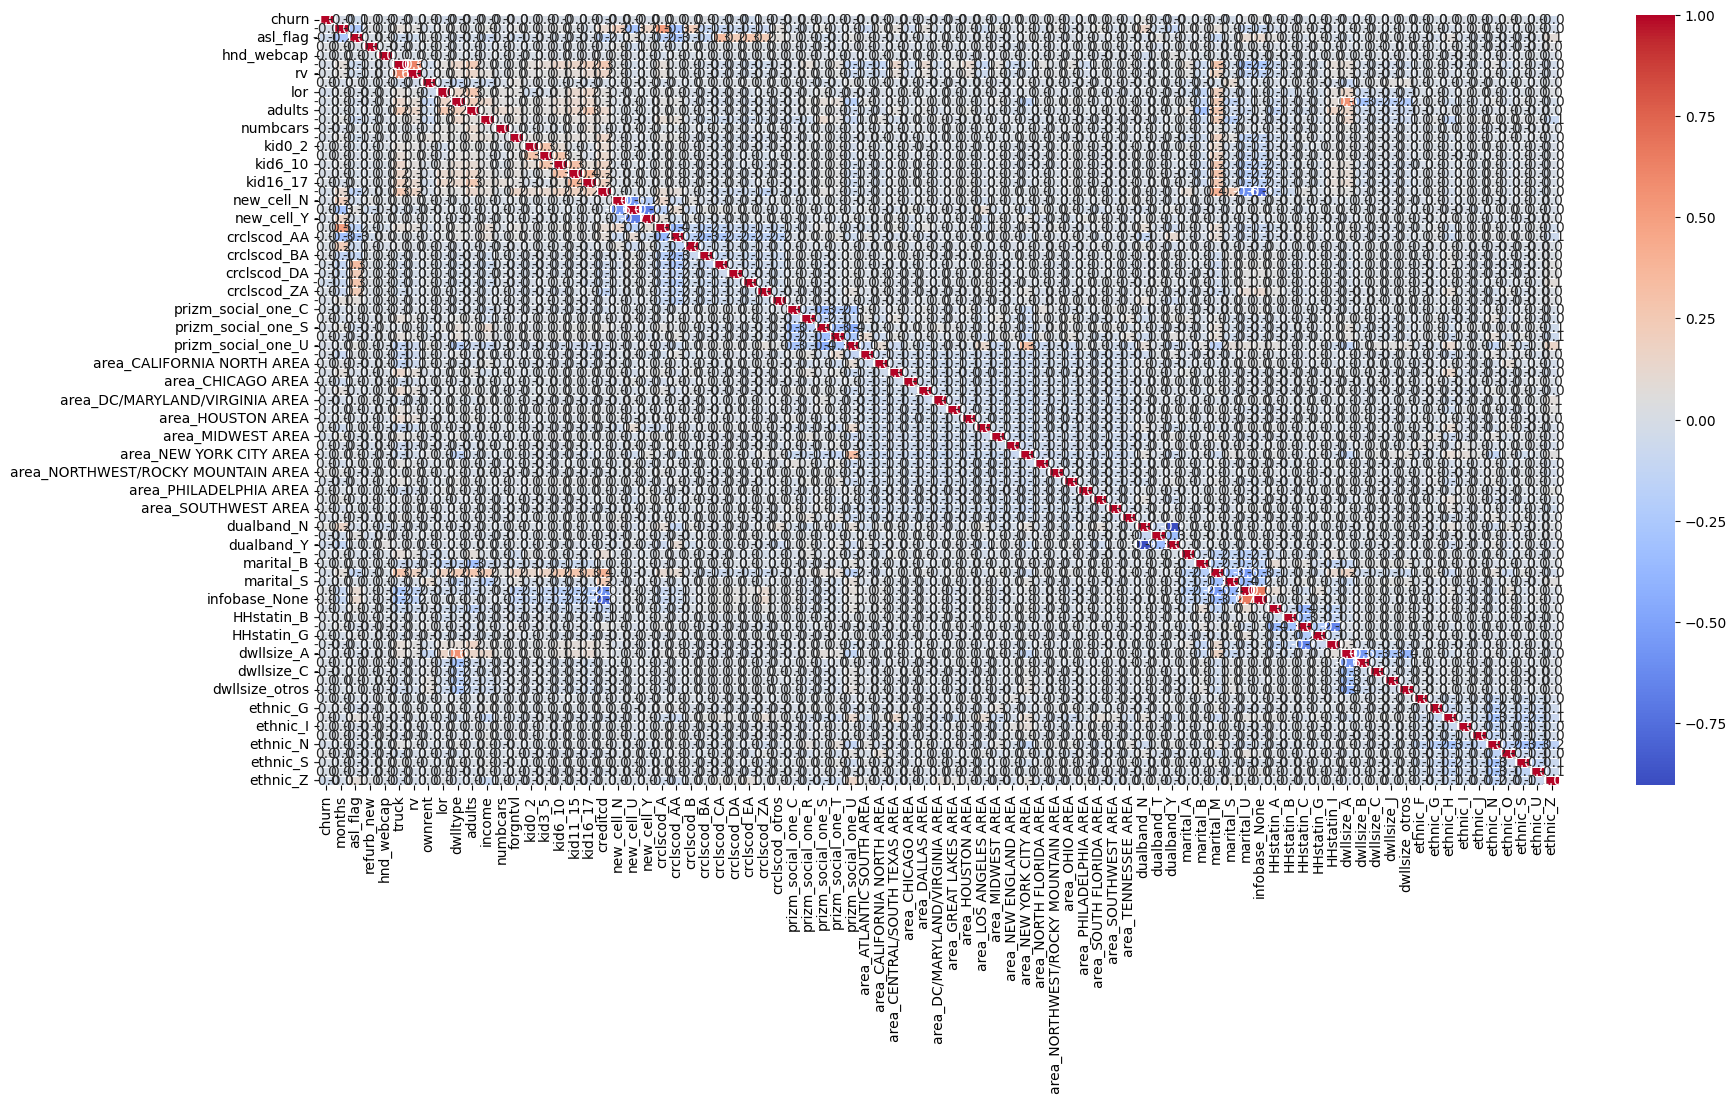

In [ ]:
plt.rcParams["figure.figsize"] = 20,10
sns.heatmap(corr,cmap='coolwarm',annot= True, fmt='.1f',linewidths=.5)

In [ ]:
df_reduced

churn    months  asl_flag  refurb_new  hnd_webcap  truck   rv  ownrent  \
0        1.0  1.000000       0.0         0.0         0.5    0.0  0.0      0.0   
1        1.0  0.944444       0.0         0.0         1.0    0.0  0.0      0.0   
2        0.0  0.981481       0.0         0.0         1.0    0.0  0.0      0.0   
3        0.0  0.925926       0.0         0.0         0.5    0.0  0.0      1.0   
4        0.0  0.962963       0.0         0.0         0.5    0.0  0.0      0.0   
...      ...       ...       ...         ...         ...    ...  ...      ...   
85958    1.0  0.074074       0.0         0.0         0.5    0.0  0.0      0.0   
85959    0.0  0.000000       0.0         0.0         0.5    0.0  0.0      0.0   
85960    0.0  0.037037       0.0         0.0         0.5    0.0  0.0      0.0   
85961    1.0  0.037037       0.0         0.0         0.5    1.0  1.0      0.0   
85962    0.0  0.074074       0.0         0.0         0.5    1.0  1.0      0.0   

            lor  dwlltype  adults  income  numbcars  forgntvl  kid0_2  kid3_5  \
0      1.000000       1.0     0.0   0.375       1.0       0.0     0.0     0.0   
1      0.466667       1.0     0.2   0.500       0.5       0.0     0.0     1.0   
2      0.400000       0.0     0.6   0.625       0.0       0.0     1.0     0.0   
3      0.333333       0.0     0.0   0.625       0.0       0.0     0.0     0.0   
4      0.066667       1.0     0.0   0.625       0.0       0.0     0.0     0.0   
...         ...       ...     ...     ...       ...       ...     ...     ...   
85958  0.066667       1.0     0.6   0.750       0.5       0.0     1.0     0.0   
85959  0.200000       1.0     0.2   0.625       0.5       0.0     0.0     0.0   
85960  0.133333       1.0     0.4   0.750       0.5       0.0     0.0     0.0   
85961  0.200000       1.0     0.0   1.000       0.5       0.0     0.0     0.0   
85962  0.200000       1.0     0.8   0.500       0.0       0.0     0.0     0.0   

       kid6_10  kid11_15  kid16_17  creditcd  new_cell_N  new_cell_U  \
0          0.0       0.0       0.0       1.0         0.0         1.0   
1          0.0       0.0       0.0       1.0         0.0         0.0   
2          0.0       0.0       0.0       1.0         0.0         0.0   
3          0.0       0.0       0.0       1.0         0.0         0.0   
4          0.0       0.0       0.0       1.0         0.0         0.0   
...        ...       ...       ...       ...         ...         ...   
85958      0.0       0.0       0.0       1.0         0.0         1.0   
85959      0.0       0.0       0.0       1.0         0.0         1.0   
85960      0.0       0.0       0.0       1.0         0.0         0.0   
85961      0.0       0.0       1.0       1.0         0.0         0.0   
85962      0.0       0.0       1.0       1.0         0.0         0.0   

       new_cell_Y  crclscod_A  crclscod_AA  crclscod_B  crclscod_BA  \
0             0.0         1.0          0.0         0.0          0.0   
1             1.0         0.0          0.0         0.0          0.0   
2             1.0         0.0          0.0         1.0          0.0   
3             1.0         1.0          0.0         0.0          0.0   
4             1.0         0.0          0.0         0.0          0.0   
...           ...         ...          ...         ...          ...   
85958         0.0         0.0          1.0         0.0          0.0   
85959         0.0         0.0          1.0         0.0          0.0   
85960         1.0         0.0          1.0         0.0          0.0   
85961         1.0         0.0          1.0         0.0          0.0   
85962         1.0         0.0          1.0         0.0          0.0   

       crclscod_CA  crclscod_DA  crclscod_EA  crclscod_ZA  crclscod_otros  \
0              0.0          0.0          0.0          0.0             0.0   
1              0.0          0.0          0.0          0.0             0.0   
2              0.0          0.0          0.0          0.0             0.0   
3              0.0          0.0    

# Guardar clean data

##Nos decidimos por final_df para continuar con los siguientes pasos ya que nos presenta mejores resultados de AUC y F1 Score al evaluar el modelo.

In [ ]:
# Guardar el DataFrame en un archivo pickle
final_df.to_pickle("final_df.pkl")

# Cargar el DataFrame desde el archivo pickle para verificar
loaded_df = pd.read_pickle("final_df.pkl")
(loaded_df.sample(10))

rev       mou    totmrc        da    ovrmou    ovrrev    vceovr  \
4810   0.039849  0.012780  0.402135  0.007764  0.003124  0.003424  0.004213   
47260  0.066907  0.082823  0.176022  0.023292  0.137013  0.187954  0.231227   
30439  0.015592  0.053515  0.198911  0.023292  0.000000  0.000000  0.000000   
20892  0.014159  0.064186  0.130246  0.015528  0.009373  0.011021  0.013559   
21463  0.006777  0.001925  0.100491  0.000000  0.001967  0.002699  0.003320   
60048  0.021648  0.094251  0.256131  0.000000  0.005670  0.005556  0.006835   
2749   0.051792  0.155590  0.237374  0.032609  0.102876  0.100803  0.124011   
5336   0.010262  0.005489  0.084492  0.000000  0.005323  0.020864  0.025667   
36940  0.015527  0.021382  0.180600  0.006211  0.000000  0.000000  0.000000   
4161   0.009964  0.000471  0.135968  0.000000  0.000000  0.000000  0.000000   

       datovr      roam  change_mou  change_rev  drop_vce  drop_dat  blck_vce  \
4810      0.0  0.000106    0.104561    0.115578  0.002865       0.0  0.000865   
47260     0.0  0.000000    0.095666    0.097204  0.042980       0.0  0.011246   
30439     0.0  0.000000    0.096150    0.099857  0.037249       0.0  0.003460   
20892     0.0  0.000000    0.101716    0.101143  0.004298       0.0  0.006920   
21463     0.0  0.000070    0.098077    0.099762  0.000000       0.0  0.019031   
60048     0.0  0.000026    0.092706    0.099831  0.063037       0.0  0.086505   
2749      0.0  0.000000    0.089189    0.099290  0.051576       0.0  0.005190   
5336      0.0  0.000000    0.100835    0.106057  0.010029       0.0  0.000865   
36940     0.0  0.000123    0.103781    0.100064  0.012894       0.0  0.001730   
4161      0.0  0.000000    0.098272    0.100054  0.000000       0.0  0.000000   

       blck_dat  unan_vce  unan_dat  plcd_vce  plcd_dat  recv_vce  recv_sms  \
4810        0.0  0.008641       0.0  0.022572       0.0  0.008607  0.000000   
47260       0.0  0.033778       0.0  0.112276       0.0  0.038880  0.000000   
30439       0.0  0.049489       0.0  0.107907       0.0  0.029482  0.000000   
20892       0.0  0.015711       0.0  0.040047       0.0  0.011476  0.000000   
21463       0.0  0.004321       0.0  0.010048       0.0  0.000989  0.000000   
60048       0.0  0.070699       0.0  0.139945       0.0  0.022161  0.000000   
2749        0.0  0.117439       0.0  0.253968       0.0  0.097448  0.000000   
5336        0.0  0.010212       0.0  0.014708       0.0  0.004848  0.000000   
36940       0.0  0.006284       0.0  0.030290       0.0  0.008904  0.002692   
4161        0.0  0.000000       0.0  0.000874       0.0  0.000000  0.000000   

       comp_vce  comp_dat  custcare  ccrndmou    cc_mou  inonemin  threeway  \
4810   0.023227       0.0  0.001974  0.003870  0.004191  0.004536  0.000000   
47260  0.115608       0.0  0.000494  0.010449  0.014495  0.017171  0.005051   
30439  0.104698       0.0  0.000000  0.000000  0.000000  0.015335  0.000000   
20892  0.039416       0.0  0.003455  0.006192  0.006651  0.009395  0.000000   
21463  0.006335       0.0  0.000494  0.001935  0.002449  0.000864  0.000000   
60048  0.113320       0.0  0.000000  0.000000  0.000000  0.008747  0.000000   
2749   0.248284       0.0  0.005429  0.015867  0.018581  0.067387  0.025253   
5336   0.012317       0.0  0.000000  0.000000  0.000000  0.004644  0.000000   
36940  0.032025       0.0  0.000000  0.000000  0.000000  0.006048  0.000000   
4161   0.001056       0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

       mou_cvce  mou_cdat  mou_rvce  owylis_vce  mouowylisv  iwylis_vce  \
4810   0.015780       0.0  0.028781    0.028453    0.010383    0.016046   
47260  0.102239       0.0  0.143134    0.096741    0.033191    0.000642   
30439  0.065589       0.0  0.047037    0.065701    0.025369    0.025032   
20892  0.010542       0.0  0.012258    0.045008    0.003267    0.020539   
21463  0.002508       0.0  0.000853    0.000517    0.000050    0.000000   
60048  0.098365       0.0  0.139232    0.069840    0.014587 

* Guardar en data path y mostrar el resultado en un head()

In [ ]:
# Guardar el DataFrame en un archivo pickle
df_reduced.to_pickle("df_reduced.pkl")

# Cargar el DataFrame desde el archivo pickle para verificar
loaded_df = pd.read_pickle("df_reduced.pkl")
(loaded_df.sample(10))

churn    months  asl_flag  refurb_new  hnd_webcap  truck   rv  ownrent  \
11700    0.0  0.481481       1.0         0.0         1.0    0.0  0.0      0.0   
23946    1.0  0.277778       0.0         0.0         0.5    1.0  0.0      1.0   
70445    1.0  0.092593       0.0         0.0         0.5    1.0  0.0      0.0   
52890    1.0  0.092593       0.0         1.0         0.5    0.0  0.0      0.0   
68806    0.0  0.018519       0.0         0.0         0.0    1.0  1.0      0.0   
21324    0.0  0.314815       0.0         1.0         0.5    0.0  0.0      0.0   
55448    1.0  0.111111       0.0         0.0         0.5    0.0  0.0      0.0   
10139    0.0  0.462963       0.0         0.0         1.0    1.0  0.0      0.0   
55599    0.0  0.111111       0.0         0.0         0.5    1.0  1.0      0.0   
74464    1.0  0.074074       0.0         0.0         0.5    0.0  0.0      0.0   

            lor  dwlltype  adults  income  numbcars  forgntvl  kid0_2  kid3_5  \
11700  0.066667       1.0     0.2   0.375       0.0       0.0     0.0     1.0   
23946  0.600000       0.0     1.0   0.625       1.0       0.0     0.0     0.0   
70445  0.133333       1.0     0.2   0.000       0.0       0.0     0.0     0.0   
52890  1.000000       1.0     1.0   0.625       0.5       0.0     0.0     0.0   
68806  0.133333       1.0     0.4   0.250       0.0       0.0     0.0     1.0   
21324  0.066667       1.0     0.6   0.750       0.5       0.0     0.0     0.0   
55448  1.000000       1.0     0.6   0.625       0.0       0.0     0.0     0.0   
10139  0.200000       1.0     0.2   0.750       0.0       0.0     0.0     0.0   
55599  0.200000       1.0     0.0   0.250       0.0       0.0     0.0     0.0   
74464  0.066667       0.0     1.0   0.750       1.0       0.0     0.0     0.0   

       kid6_10  kid11_15  kid16_17  creditcd  new_cell_N  new_cell_U  \
11700      1.0       0.0       0.0       1.0         1.0         0.0   
23946      0.0       0.0       1.0       1.0         0.0         1.0   
70445      0.0       0.0       0.0       1.0         0.0         1.0   
52890      0.0       0.0       0.0       1.0         0.0         1.0   
68806      0.0       0.0       0.0       1.0         0.0         1.0   
21324      0.0       0.0       0.0       0.0         1.0         0.0   
55448      0.0       0.0       0.0       0.0         0.0         1.0   
10139      0.0       0.0       0.0       1.0         1.0         0.0   
55599      0.0       0.0       0.0       1.0         0.0         1.0   
74464      0.0       0.0       0.0       0.0         0.0         1.0   

       new_cell_Y  crclscod_A  crclscod_AA  crclscod_B  crclscod_BA  \
11700         0.0         0.0          0.0         0.0          1.0   
23946         0.0         0.0          1.0         0.0          0.0   
70445         0.0         0.0          1.0         0.0          0.0   
52890         0.0         1.0          0.0         0.0          0.0   
68806         0.0         0.0          1.0         0.0          0.0   
21324         0.0         0.0          0.0         0.0          0.0   
55448         0.0         0.0          1.0         0.0          0.0   
10139         0.0         1.0          0.0         0.0          0.0   
55599         0.0         0.0          1.0         0.0          0.0   
74464         0.0         0.0          0.0         0.0          1.0   

       crclscod_CA  crclscod_DA  crclscod_EA  crclscod_ZA  crclscod_otros  \
11700          0.0          0.0          0.0          0.0             0.0   
23946          0.0          0.0          0.0          0.0             0.0   
70445          0.0          0.0          0.0          0.0             0.0   
52890          0.0          0.0          0.0          0.0             0.0   
68806          0.0          0.0          0.0          0.0             0.0   
21324          0.0          0.0          0.0          1.0             0.0   
55448          0.0          0.0          0.0          0.0             0.0   
10139          0.0          0.0 